## Problem Statement:

An E Commerce company provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_excel('E:\GL\Course Content\Capstone\Capstone Business Project\CC_EDTH_02_Customer Churn\Customer Churn Data.xlsx', 
                     sheet_name='Data for DSBA')
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
data.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [4]:
print('The number of rows (observations) is',data.shape[0],'\n''The number of columns (variables) is',data.shape[1])

The number of rows (observations) is 11260 
The number of columns (variables) is 19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

## Check Missing Values in dataset

In [6]:
data.isnull().sum().sort_values(ascending=False)

cashback                   471
Day_Since_CC_connect       357
Complain_ly                357
Login_device               221
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Account_user_count         112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Tenure                     102
rev_per_month              102
Service_Score               98
account_segment             97
rev_growth_yoy               0
coupon_used_for_payment      0
Churn                        0
AccountID                    0
dtype: int64

In [7]:
data.isnull().sum().sum()

2676

### Checking Duplicates

In [8]:
data.duplicated().sum()

0

## EDA

In [9]:
data.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

In [10]:
data.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [11]:
data.Tenure = data.Tenure.replace('#', np.NaN)

In [12]:
data.Tenure.unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [13]:
data.Tenure.isnull().sum()

218

In [14]:
data.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [15]:
data.City_Tier.unique()

array([ 3.,  1., nan,  2.])

In [16]:
data.City_Tier.isnull().sum()

112

In [17]:
data.CC_Contacted_LY.value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
5.0        8
43.0       8
4.0        1
129.0      1
132.0      1
127.0      1
126.0      1
Name: CC_Contacted_LY, dtype: int64

In [18]:
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [19]:
data.CC_Contacted_LY.isnull().sum()

102

In [20]:
data.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [21]:
data.Payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [22]:
data.Payment.isnull().sum()

109

In [23]:
data.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [24]:
data.Gender = data.Gender.replace("M", 'Male').replace("F", 'Female')

In [25]:
data.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [26]:
data.Gender.isnull().sum()

108

In [27]:
data.Service_Score.value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [28]:
data.Service_Score.unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [29]:
data.Service_Score.isnull().sum()

98

In [30]:
data.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [31]:
data.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [32]:
data.Account_user_count.isnull().sum()

112

In [33]:
data.Account_user_count = data.Account_user_count.replace('@', np.NaN)

In [34]:
data.Account_user_count.unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [35]:
data.Account_user_count.isnull().sum()

444

In [36]:
data.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [37]:
data.account_segment = data.account_segment.replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [38]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [39]:
data.account_segment.isnull().sum()

97

In [40]:
data.CC_Agent_Score.value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [41]:
data.CC_Agent_Score.unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [42]:
data.CC_Agent_Score.isnull().sum()

116

In [43]:
data.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [44]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [45]:
data.Marital_Status.isnull().sum()

212

In [46]:
data.rev_per_month.value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
124       5
123       5
107       5
140       4
136       4
133       4
129       4
118       4
115       3
138       3
119       3
126       3
130       3
127       3
137       3
101       3
117       3
108       3
116       3
110       3
113       3
105       2
134       2
22        2
114       2
125       2
19        2
139       2
120       2
121       2
131       2
135       1
21        1
122       1
20        1
23        1
25        1
100       1
103       1
104       1
111       1
109       1
Name: rev_per_month, dtype: int64

In [47]:
data.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [48]:
data.rev_per_month.isnull().sum()

102

In [49]:
data.rev_per_month = data.rev_per_month.replace('+', np.NaN)

In [50]:
data.rev_per_month.unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [51]:
data.rev_per_month.isnull().sum()

791

In [52]:
data.Complain_ly.value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [53]:
data.Complain_ly.unique()

array([ 1.,  0., nan])

In [54]:
data.Complain_ly.isnull().sum()

357

In [55]:
data.rev_growth_yoy.value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [56]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [57]:
data.rev_growth_yoy = data.rev_growth_yoy.replace('$', np.NaN)

In [58]:
data.rev_growth_yoy.unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [59]:
data.rev_growth_yoy.isnull().sum()

3

In [60]:
data.coupon_used_for_payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
*        1
#        1
$        1
Name: coupon_used_for_payment, dtype: int64

In [61]:
data.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [62]:
data.coupon_used_for_payment.isnull().sum()

0

In [63]:
data.coupon_used_for_payment = data.coupon_used_for_payment.replace('#', np.NaN).replace('$', np.NaN).replace('*', np.NaN)

In [64]:
data.coupon_used_for_payment.unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [65]:
data.rev_growth_yoy.isnull().sum()

3

In [66]:
data.Day_Since_CC_connect.value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
47       2
30       2
31       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [67]:
data.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [68]:
data.Day_Since_CC_connect.isnull().sum()

357

In [69]:
data.Day_Since_CC_connect = data.Day_Since_CC_connect.replace('$', np.NaN)

In [70]:
data.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [71]:
data.Day_Since_CC_connect.isnull().sum()

358

In [72]:
data.cashback.value_counts()

155.62                10
149.68                 9
149.36                 9
145.08                 9
154.73                 9
152.28                 9
152.07                 8
148.77                 8
128.19                 8
154.1                  8
148.42                 8
130.72                 8
165                    8
123.41999999999999     8
153.04                 8
148.8                  7
188.47                 7
149.78                 7
150.59                 7
155.38                 7
146.27                 7
161.62                 7
124.03999999999999     7
151.1                  7
154.67                 7
148.4                  7
161.42                 7
149.04                 7
149.07                 7
162.6                  7
124.50999999999999     7
200.96                 7
154.72                 7
152.04                 7
174.36                 7
154.6                  7
193.04                 7
180.62                 7
152.06                 7
129.36                 7


In [73]:
data.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [74]:
data.cashback.isnull().sum()

471

In [75]:
data.cashback = data.cashback.replace('$', np.NaN)

In [76]:
data.cashback.unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

In [77]:
data.cashback.isnull().sum()

473

In [78]:
data.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [79]:
data.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [80]:
data.Login_device.isnull().sum()

221

In [81]:
data.Login_device = data.Login_device.replace('&&&&', np.NaN)

In [82]:
data.Login_device.unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [83]:
data.Login_device.isnull().sum()

760

In [84]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [85]:
data.isnull().sum().sum()

4361

### Modified Data Type

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Impute Missing Values

In [87]:
data.Tenure.median()

9.0

In [88]:
data[data.Tenure == 9].shape[0]

496

In [89]:
data.Tenure.isnull().sum()

218

In [90]:
data.Tenure = data.Tenure.fillna(data.Tenure.median())
data[data.Tenure.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [91]:
data[data.Tenure == 9].shape[0]

714

In [92]:
data.Tenure = data.Tenure.astype('int64')

In [93]:
data.Tenure.dtype

dtype('int64')

In [94]:
data.CC_Contacted_LY.median()

16.0

In [95]:
data[data.CC_Contacted_LY == 16].shape[0]

663

In [96]:
data.CC_Contacted_LY.isnull().sum()

102

In [97]:
data.CC_Contacted_LY = data.CC_Contacted_LY.fillna(data.CC_Contacted_LY.median())
data[data.CC_Contacted_LY.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [98]:
data[data.CC_Contacted_LY == 16].shape[0]

765

In [99]:
data.CC_Contacted_LY = data.CC_Contacted_LY.astype('int64')

In [100]:
data.CC_Contacted_LY.dtype

dtype('int64')

In [101]:
data.Account_user_count.median()

4.0

In [102]:
data[data.Account_user_count == 4].shape[0]

4569

In [103]:
data.Account_user_count.isnull().sum()

444

In [104]:
data.Account_user_count = data.Account_user_count.fillna(data.Account_user_count.median())
data[data.Account_user_count.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [105]:
data[data.Account_user_count == 4].shape[0]

5013

In [106]:
data.Account_user_count = data.Account_user_count.astype('int64')

In [107]:
data.Account_user_count.dtype

dtype('int64')

In [108]:
data.rev_per_month.median()

5.0

In [109]:
data[data.rev_per_month == 5].shape[0]

1337

In [110]:
data.rev_per_month.isnull().sum()

791

In [111]:
data.rev_per_month = data.rev_per_month.fillna(data.rev_per_month.median())
data[data.rev_per_month.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [112]:
data[data.rev_per_month == 5].shape[0]

2128

In [113]:
data.rev_per_month = data.rev_per_month.astype('int64')

In [114]:
data.rev_per_month.dtype

dtype('int64')

In [115]:
data.rev_growth_yoy.median()

15.0

In [116]:
data[data.rev_growth_yoy == 15].shape[0]

1283

In [117]:
data.rev_growth_yoy.isnull().sum()

3

In [118]:
data.rev_growth_yoy = data.rev_growth_yoy.fillna(data.rev_growth_yoy.median())
data[data.rev_growth_yoy.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [119]:
data[data.rev_growth_yoy == 15].shape[0]

1286

In [120]:
data.rev_growth_yoy = data.rev_growth_yoy.astype('int64')

In [121]:
data.rev_growth_yoy.dtype

dtype('int64')

In [122]:
data.coupon_used_for_payment.median()

1.0

In [123]:
data[data.coupon_used_for_payment == 1].shape[0]

4373

In [124]:
data.coupon_used_for_payment.isnull().sum()

3

In [125]:
data.coupon_used_for_payment = data.coupon_used_for_payment.fillna(data.coupon_used_for_payment.median())
data[data.coupon_used_for_payment.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [126]:
data[data.coupon_used_for_payment == 1].shape[0]

4376

In [127]:
data.coupon_used_for_payment = data.coupon_used_for_payment.astype('int64')

In [128]:
data.coupon_used_for_payment.dtype

dtype('int64')

In [129]:
data.Day_Since_CC_connect.median()

3.0

In [130]:
data[data.Day_Since_CC_connect == 3].shape[0]

1816

In [131]:
data.Day_Since_CC_connect.isnull().sum()

358

In [132]:
data.Day_Since_CC_connect = data.Day_Since_CC_connect.fillna(data.Day_Since_CC_connect.median())
data[data.Day_Since_CC_connect.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [133]:
data[data.Day_Since_CC_connect == 3].shape[0]

2174

In [134]:
data.Day_Since_CC_connect = data.Day_Since_CC_connect.astype('int64')

In [135]:
data.Day_Since_CC_connect.dtype

dtype('int64')

In [136]:
data.cashback.median()

165.25

In [137]:
data.cashback.isnull().sum()

473

In [138]:
data.cashback = data.cashback.fillna(data.cashback.median())
data[data.cashback.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [139]:
data.cashback.dtype

dtype('float64')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [141]:
data.City_Tier.isnull().sum()

112

In [142]:
data.City_Tier.mode()

0    1.0
dtype: float64

In [143]:
data[data.City_Tier == 1].shape[0]

7263

In [144]:
data.City_Tier = data.City_Tier.fillna(data.City_Tier.mode()[0])
data[data.City_Tier.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [145]:
data[data.City_Tier == 1].shape[0]

7375

In [146]:
data.City_Tier = data.City_Tier.astype('int64')

In [147]:
data.City_Tier.dtype

dtype('int64')

In [148]:
data.Service_Score.isnull().sum()

98

In [149]:
data.Service_Score.mode()

0    3.0
dtype: float64

In [150]:
data[data.Service_Score == 3].shape[0]

5490

In [151]:
data.Service_Score = data.Service_Score.fillna(data.Service_Score.mode()[0])
data[data.Service_Score.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [152]:
data[data.Service_Score == 3].shape[0]

5588

In [153]:
data.Service_Score = data.Service_Score.astype('int64')

In [154]:
data.Service_Score.dtype

dtype('int64')

In [155]:
data.CC_Agent_Score.isnull().sum()

116

In [156]:
data.CC_Agent_Score.mode()

0    3.0
dtype: float64

In [157]:
data[data.CC_Agent_Score == 3].shape[0]

3360

In [158]:
data.CC_Agent_Score = data.CC_Agent_Score.fillna(data.CC_Agent_Score.mode()[0])
data[data.CC_Agent_Score.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [159]:
data[data.CC_Agent_Score == 3].shape[0]

3476

In [160]:
data.CC_Agent_Score = data.CC_Agent_Score.astype('int64')

In [161]:
data.CC_Agent_Score.dtype

dtype('int64')

In [162]:
data.Complain_ly.isnull().sum()

357

In [163]:
data.Complain_ly.mode()

0    0.0
dtype: float64

In [164]:
data[data.Complain_ly == 0].shape[0]

7792

In [165]:
data.Complain_ly = data.Complain_ly.fillna(data.Complain_ly.mode()[0])
data[data.Complain_ly.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [166]:
data[data.Complain_ly == 0].shape[0]

8149

In [167]:
data.Complain_ly = data.Complain_ly.astype('int64')

In [168]:
data.Complain_ly.dtype

dtype('int64')

In [169]:
data.Payment.isnull().sum()

109

In [170]:
data.Payment.mode()

0    Debit Card
dtype: object

In [171]:
data.Payment.describe()

count          11151
unique             5
top       Debit Card
freq            4587
Name: Payment, dtype: object

In [172]:
data.Payment = data.Payment.fillna(data.Payment.mode()[0])
data[data.Payment.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [173]:
data.Payment.describe()

count          11260
unique             5
top       Debit Card
freq            4696
Name: Payment, dtype: object

In [174]:
data.Gender.isnull().sum()

108

In [175]:
data.Gender.mode()

0    Male
dtype: object

In [176]:
data.Gender.describe()

count     11152
unique        2
top        Male
freq       6704
Name: Gender, dtype: object

In [177]:
data.Gender = data.Gender.fillna(data.Gender.mode()[0])
data[data.Gender.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [178]:
data.Gender.describe()

count     11260
unique        2
top        Male
freq       6812
Name: Gender, dtype: object

In [179]:
data.account_segment.isnull().sum()

97

In [180]:
data.account_segment.mode()

0    Regular Plus
dtype: object

In [181]:
data.account_segment.describe()

count            11163
unique               5
top       Regular Plus
freq              4124
Name: account_segment, dtype: object

In [182]:
data.account_segment = data.account_segment.fillna(data.account_segment.mode()[0])
data[data.account_segment.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [183]:
data.account_segment.describe()

count            11260
unique               5
top       Regular Plus
freq              4221
Name: account_segment, dtype: object

In [184]:
data.Marital_Status.isnull().sum()

212

In [185]:
data.Marital_Status.mode()

0    Married
dtype: object

In [186]:
data.Marital_Status.describe()

count       11048
unique          3
top       Married
freq         5860
Name: Marital_Status, dtype: object

In [187]:
data.Marital_Status = data.Marital_Status.fillna(data.Marital_Status.mode()[0])
data[data.Marital_Status.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [188]:
data.Marital_Status.describe()

count       11260
unique          3
top       Married
freq         6072
Name: Marital_Status, dtype: object

In [189]:
data.Login_device.isnull().sum()

760

In [190]:
data.Login_device.mode()

0    Mobile
dtype: object

In [191]:
data.Login_device.describe()

count      10500
unique         2
top       Mobile
freq        7482
Name: Login_device, dtype: object

In [192]:
data.Login_device = data.Login_device.fillna(data.Login_device.mode()[0])
data[data.Login_device.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [193]:
data.Login_device.describe()

count      11260
unique         2
top       Mobile
freq        8242
Name: Login_device, dtype: object

In [194]:
data.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  int64  
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  int64  
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  int64  
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  int64  
 14  rev_growth_yoy        

### Encoding the Object Variables (using Label Encoding)

In [196]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
Categories (5, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[3 2 1 0 4]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  int64  
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_Score            11260 non-null  int64  
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  int64  
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  int64  
 14  rev_growth_yoy        

### Outlier Treatment

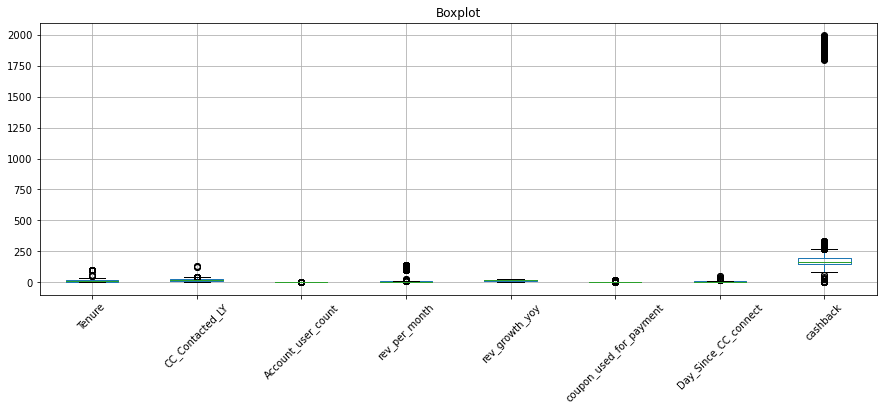

In [198]:
data[['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
      'Day_Since_CC_connect','cashback']].boxplot(figsize=(15,5))
plt.title("Boxplot")
plt.xticks(rotation=45)
plt.show()

In [199]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100))

,0
AccountID,0.000000
Churn,0.000000
Tenure,1.163410
City_Tier,0.000000
CC_Contacted_LY,0.035524
Payment,0.000000
Gender,0.000000
Service_Score,0.000000
Account_user_count,0.000000
account_segment,0.000000


In [200]:
data_new = data.copy()

In [201]:
data_new.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3,6,2,0,3,3,3,2,2,9,1,11,1,5,159.93,1
1,20001,1,0,1,8,4,1,3,4,2,3,2,7,1,15,0,0,120.90,1
2,20002,1,0,1,30,2,1,2,4,2,3,2,6,1,14,0,3,165.25,1
3,20003,1,0,3,15,2,1,2,4,3,5,2,8,0,23,0,3,134.07,1
4,20004,1,0,1,12,1,1,2,3,2,5,2,3,0,11,1,3,129.60,1


In [202]:
data_new.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [230]:
data_new.to_csv('data_new_Capstone.csv',index=False)

### Split Data Keeping Outliers (xo & yo)

In [203]:
xo = data.drop(['Churn','AccountID'], axis = 1)
yo = data['Churn']

In [204]:
xo.shape

(11260, 17)

In [205]:
yo.shape

(11260,)

Above data is split into train and test for xo and yo dataframes retaining the outliers as well as non scaled variables

### Split Data to Remove Outliers (x & y)

In [206]:
x = data.drop(['Churn','AccountID'], axis = 1)
y = data['Churn']

In [207]:
x.shape

(11260, 17)

In [208]:
y.shape

(11260,)

In [209]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.05,0.95])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [210]:
lw,up=remove_outlier(x['Tenure'])
x['Tenure']=np.where(x['Tenure']>up,up,x['Tenure'])
x['Tenure']=np.where(x['Tenure']<lw,lw,x['Tenure'])

lw,up=remove_outlier(x['CC_Contacted_LY'])
x['CC_Contacted_LY']=np.where(x['CC_Contacted_LY']>up,up,x['CC_Contacted_LY'])
x['CC_Contacted_LY']=np.where(x['CC_Contacted_LY']<lw,lw,x['CC_Contacted_LY'])

lw,up=remove_outlier(x['rev_per_month'])
x['rev_per_month']=np.where(x['rev_per_month']>up,up,x['rev_per_month'])
x['rev_per_month']=np.where(x['rev_per_month']<lw,lw,x['rev_per_month'])

lw,up=remove_outlier(x['coupon_used_for_payment'])
x['coupon_used_for_payment']=np.where(x['coupon_used_for_payment']>up,up,x['coupon_used_for_payment'])
x['coupon_used_for_payment']=np.where(x['coupon_used_for_payment']<lw,lw,x['coupon_used_for_payment'])

lw,up=remove_outlier(x['Day_Since_CC_connect'])
x['Day_Since_CC_connect']=np.where(x['Day_Since_CC_connect']>up,up,x['Day_Since_CC_connect'])
x['Day_Since_CC_connect']=np.where(x['Day_Since_CC_connect']<lw,lw,x['Day_Since_CC_connect'])

lw,up=remove_outlier(x['cashback'])
x['cashback']=np.where(x['cashback']>up,up,x['cashback'])
x['cashback']=np.where(x['cashback']<lw,lw,x['cashback'])

x.shape

(11260, 17)

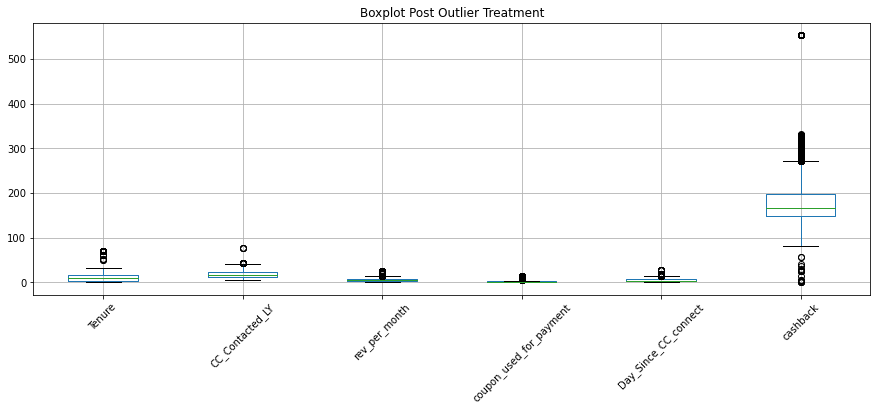

In [211]:
x[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment','Day_Since_CC_connect',
   'cashback']].boxplot(figsize=(15,5))
plt.title("Boxplot Post Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

## PROJECT NOTE 2

In [212]:
data.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [213]:
data.Churn.value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### Train Test Split (xo & yo)

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
xo_train, xo_test, yo_train, yo_test = train_test_split(xo,yo, test_size= 0.30, random_state=1, stratify= data['Churn'])

We stratify = yo & y because this data seems imbalanced and could possibly result into different proportions in the y variable between train and test set.

In [216]:
# Checking dimensions on the train and test data
print('xo_train: ',xo_train.shape)
print('xo_test: ',xo_test.shape)
print('yo_train: ',yo_train.shape)
print('yo_test: ',yo_test.shape)

xo_train:  (7882, 17)
xo_test:  (3378, 17)
yo_train:  (7882,)
yo_test:  (3378,)


In [217]:
df_train = pd.concat([xo_train,yo_train], axis=1)
df_test = pd.concat([xo_test,yo_test], axis=1)

### Train Test Split (x & y)

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=1, stratify= data['Churn'])

In [219]:
df1_train = pd.concat([x_train,y_train], axis=1)
df1_test = pd.concat([x_test,y_test], axis=1)

In [220]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (7882, 17)
x_test:  (3378, 17)
y_train:  (7882,)
y_test:  (3378,)


In [221]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.83
1    0.17
Name: Churn, dtype: float64
 
0    0.83
1    0.17
Name: Churn, dtype: float64


### Scaling the variables

In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
sc = StandardScaler()

In [224]:
x_scaled_train = sc.fit_transform(x_train)

In [226]:
x_scaled_train

array([[-0.2476595 , -0.70743589, -0.67741906, ..., -0.7103418 ,
        -0.77730251,  0.60559211],
       [-0.81660506,  1.48396112,  0.13219687, ..., -0.7103418 ,
        -0.92819633,  0.60559211],
       [ 0.13163753,  1.48396112,  0.94181279, ...,  1.5078735 ,
         0.95490543,  0.60559211],
       ...,
       [-0.91142931,  1.48396112, -1.25571615, ..., -0.43306488,
        -0.58341474, -1.65127646],
       [ 1.45917716, -0.70743589,  0.94181279, ..., -0.43306488,
        -0.27614911,  0.60559211],
       [ 0.32128605, -0.70743589,  0.01653745, ...,  0.12148894,
         0.10531844, -1.65127646]])

In [281]:
x_scaled_train = pd.DataFrame(x_scaled_train, index = x_train.index, columns = x_train.columns)
x_scaled_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
799,-0.247660,-0.707436,-0.677419,0.240766,0.81137,0.130951,-0.696651,-0.153691,-0.056874,-1.787125,-1.288483,1.597013,-0.579515,-0.399716,-0.710342,-0.777303,0.605592
7530,-0.816605,1.483961,0.132197,1.236945,0.81137,-1.252638,-0.696651,-0.153691,0.672037,-0.254359,-0.697668,-0.626169,-0.313639,0.105749,-0.710342,-0.928196,0.605592
6908,0.131638,1.483961,0.941813,1.236945,0.81137,0.130951,-0.696651,1.639635,1.400947,1.278407,-0.106852,-0.626169,-0.845390,1.116677,1.507873,0.954905,0.605592
3251,1.459177,1.483961,-0.908738,1.236945,0.81137,0.130951,0.298276,1.639635,1.400947,-1.787125,-0.106852,-0.626169,-1.111265,0.105749,3.448812,1.853794,0.605592
5553,-0.911429,1.483961,-0.214781,1.236945,0.81137,0.130951,0.298276,0.742972,-1.514695,1.278407,-0.697668,-0.626169,-0.313639,0.105749,0.953320,-0.262869,0.605592


In [227]:
x_scaled_test = sc.transform(x_test)

In [228]:
x_scaled_test

array([[-0.15283524, -0.70743589,  0.24785628, ..., -0.7103418 ,
        -0.27614911, -1.65127646],
       [ 0.8902316 , -0.70743589, -1.14005673, ..., -1.26489562,
         1.42153088,  0.60559211],
       [-0.2476595 , -0.70743589,  0.71049396, ..., -0.7103418 ,
         0.19479233, -1.65127646],
       ...,
       [-0.05801098, -0.70743589,  0.3635157 , ...,  0.67604276,
        -0.56498876,  0.60559211],
       [-0.91142931, -0.70743589,  0.24785628, ..., -0.7103418 ,
        -0.84851643,  0.60559211],
       [-0.15283524, -0.70743589,  0.82615337, ..., -0.15578797,
         0.58389587,  0.60559211]])

In [282]:
x_scaled_test = pd.DataFrame(x_scaled_test, index = x_test.index, columns = x_test.columns)

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
6888,-0.152835,-0.707436,0.247856,0.240766,0.811370,0.130951,-2.686506,-0.153691,0.672037,-0.254359,-0.993076,-0.626169,2.079236,-0.399716,-0.710342,-0.276149,-1.651276
467,0.890232,-0.707436,-1.140057,2.233125,-1.232484,-1.252638,-0.696651,1.639635,-0.785784,-1.787125,-0.993076,1.597013,-1.377140,0.611213,-1.264896,1.421531,0.605592
2347,-0.247660,-0.707436,0.710494,0.240766,0.811370,-1.252638,-0.696651,-1.947016,-1.514695,1.278407,-0.697668,-0.626169,-1.377140,0.105749,-0.710342,0.194792,-1.651276
1794,0.131638,-0.707436,-0.446100,0.240766,-1.232484,-1.252638,-0.696651,-0.153691,-0.056874,-0.254359,-0.993076,-0.626169,-1.377140,-0.399716,0.676043,-0.735969,-1.651276
3125,-0.911429,-0.707436,0.479175,-0.755413,0.811370,0.130951,0.298276,-1.947016,-0.056874,-1.787125,1.074779,1.597013,-0.845390,-0.399716,0.953320,1.314959,0.605592


Above data is split into train and test for x and y dataframes where the variables in train are fit and transformed using standard scaler to bring the variables to a mean of 0 and std of 1 and also the outliers are treated with upper limit at 95% quantile and lower limit at 05% quantile.

## SMOTE

In [316]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1, sampling_strategy = .50)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
xo_train_res, yo_train_res = sm.fit_resample(xo_train, yo_train)

In [255]:
x_train_res.shape

(9832, 17)

In [256]:
xo_train_res.shape

(9832, 17)

In [304]:
y_train_res.shape

(9832,)

In [305]:
yo_train_res.shape

(9832,)

In [257]:
x_train.shape

(7882, 17)

In [307]:
xo_train.shape

(7882, 17)

In [306]:
y_train.shape

(7882,)

In [308]:
yo_train.shape

(7882,)

In [258]:
x_test.shape

(3378, 17)

## Model Building

### Logistic Regression (Scaled Dataset without Outliers - x_scaled_train &  x_scaled_test)

In [230]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as SM
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [236]:
lr = LogisticRegression()
lr.fit(x_scaled_train, y_train)

LogisticRegression()

### Prediction on Train set

In [252]:
y_train_predict = lr.predict(x_scaled_train)
model_score = lr.score(x_scaled_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.8841664552144126 

Confusion Matrix 
 [[6385  170]
 [ 743  584]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.44      0.56      1327

    accuracy                           0.88      7882
   macro avg       0.84      0.71      0.75      7882
weighted avg       0.88      0.88      0.87      7882



AUC: 0.872


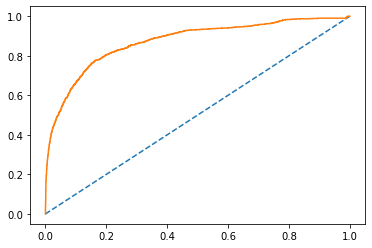

In [256]:
# predict probabilities
probs = lr.predict_proba(x_scaled_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [250]:
y_test_predict = lr.predict(x_scaled_test)
model_score = lr.score(x_scaled_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.8827708703374778 

Confusion Matrix 
 [[2732   77]
 [ 319  250]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.76      0.44      0.56       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378



AUC: 0.872


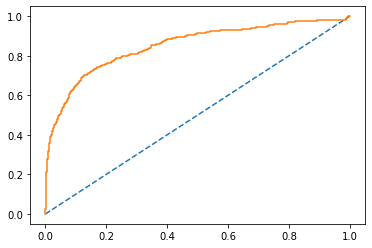

In [257]:
# predict probabilities
probs = lr.predict_proba(x_scaled_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

- Recall is very poor. However no signs of overfitting.

### Logistic Regression (Unscaled Dataset without Outliers - x_train &  x_test)

In [246]:
lr2 = LogisticRegression()
lr2.fit(x_train, y_train)

C:\Users\Tejas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction on Train set

In [259]:
y_train_predict = lr2.predict(x_train)
model_score = lr2.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.8779497589444304 

Confusion Matrix 
 [[6355  200]
 [ 762  565]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.74      0.43      0.54      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.70      0.73      7882
weighted avg       0.87      0.88      0.86      7882



AUC: 0.867


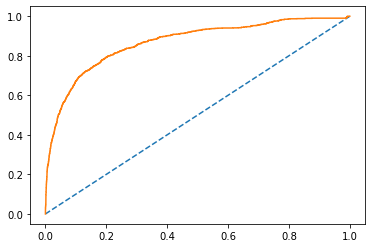

In [261]:
# predict probabilities
probs = lr2.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [262]:
y_test_predict = lr2.predict(x_test)
model_score = lr2.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.8789224393132031 

Confusion Matrix 
 [[2721   88]
 [ 321  248]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.74      0.44      0.55       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378



AUC: 0.867


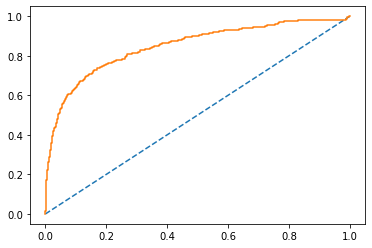

In [264]:
# predict probabilities
probs = lr2.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

- Not much difference in model performance for unscaled data compared to scaled data as well. Recall for objective class 1 is still very poor.

### Logistic Regression SM models (Unscaled Dataset without Outliers - x_train &  x_test)

In [271]:
x.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [273]:
f_1 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Payment + Gender + Service_Score + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device'  

In [274]:
model_1 = SM.logit(formula = f_1, data=df1_train).fit()

Optimization terminated successfully.
         Current function value: 0.311567
         Iterations 8


In [275]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7864
Method:                           MLE   Df Model:                           17
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3126
Time:                        17:25:04   Log-Likelihood:                -2455.8
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.4338      0.320    -10.740      0.000      -4.060      -2.807
Tenure                     -0.1658      0.007    -22.907      0.000      -0.180      -0.152
City_Tier                   0.3321      0.040      8.223      0.000       0.253       0.411
CC_Contacted_LY             0.0299      0.004      7.036      0.000       0.022       0.038
Payment                    -0.0565      0.036     -1.555      0.120      -0.128       0.015
Gender                      0.3120      0.076      4.123      0.000       0.164       0.460
Service_Score              -0.0707      0.055     -1.288      0.198      -0.178       0.037
Account_user_count          0.3615      0.040      8.984      0.000       0.283       0.440
account_segment            -0.3470      0.037     -9.337      0.000      -0.420      -0.274
CC_Agent_Score              0.2763      0.027     10.156      0.000       0.223       0.330
Marital_Status              0.6103      0.057     10.704      0.000       0.499       0.722
rev_per_month               0.0908      0.010      8.821      0.000       0.071       0.111
Complain_ly                 1.5941      0.076     20.968      0.000       1.445       1.743
rev_growth_yoy             -0.0264      0.010     -2.643      0.008      -0.046      -0.007
coupon_used_for_payment     0.1288      0.021      6.014      0.000       0.087       0.171
Day_Since_CC_connect       -0.1153      0.013     -8.777      0.000      -0.141      -0.090
cashback                   -0.0026      0.001     -3.012      0.003      -0.004      -0.001
Login_device               -0.4197      0.079     -5.290      0.000      -0.575      -0.264
===========================================================================================
"""

- We can see that few variables are insignificant & may not be useful to discriminate cases of Churn. Let us look at the adjusted pseudo R-square value. 

In [277]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.3078701008059378


- We see that adjusted pseudo R square of 0.308 is now close to pseudo R square of 0.31, thus suggesting presence of lesser insignificant variables (variables having p value > 0.05) in the model_1. These can be identified as Service Score and Payment.
- We are dropping Service Score as during the EDA we saw it is not a very significant variable when predicting Churn possibility and also we saw earlier that it is having P value > 0.05. 

In [281]:
f_2 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Payment + Gender + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device'  

In [282]:
model_2 = SM.logit(formula = f_2, data=df1_train).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.311673
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7865
Method:                           MLE   Df Model:                           16
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3124
Time:                        18:18:45   Log-Likelihood:                -2456.6
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.5331      0.311    -11.377      0.000      -4.142      -2.924
Tenure                     -0.1657      0.007    -22.879      0.000      -0.180      -0.151
City_Tier                   0.3331      0.040      8.251      0.000       0.254       0.412
CC_Contacted_LY             0.0297      0.004      6.989      0.000       0.021       0.038
Payment                    -0.0561      0.036     -1.547      0.122      -0.127       0.015
Gender                      0.3139      0.076      4.150      0.000       0.166       0.462
Account_user_count          0.3465      0.038      9.012      0.000       0.271       0.422
account_segment            -0.3488      0.037     -9.378      0.000      -0.422      -0.276
CC_Agent_Score              0.2746      0.027     10.109      0.000       0.221       0.328
Marital_Status              0.6129      0.057     10.755      0.000       0.501       0.725
rev_per_month               0.0899      0.010      8.756      0.000       0.070       0.110
Complain_ly                 1.5949      0.076     20.982      0.000       1.446       1.744
rev_growth_yoy             -0.0273      0.010     -2.737      0.006      -0.047      -0.008
coupon_used_for_payment     0.1260      0.021      5.888      0.000       0.084       0.168
Day_Since_CC_connect       -0.1160      0.013     -8.830      0.000      -0.142      -0.090
cashback                   -0.0027      0.001     -3.129      0.002      -0.004      -0.001
Login_device               -0.4187      0.079     -5.278      0.000      -0.574      -0.263
===========================================================================================
"""

- We are also removing Payment as during the EDA we saw it is also not a very significant variable when predicting Churn possibility and also we can see that it is having P value > 0.05. 

In [283]:
f_3 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Gender + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device'  

In [284]:
model_3 = SM.logit(formula = f_3, data=df1_train).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.311825
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7866
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3121
Time:                        18:23:11   Log-Likelihood:                -2457.8
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.5908      0.308    -11.648      0.000      -4.195      -2.987
Tenure                     -0.1658      0.007    -22.886      0.000      -0.180      -0.152
City_Tier                   0.3174      0.039      8.127      0.000       0.241       0.394
CC_Contacted_LY             0.0295      0.004      6.958      0.000       0.021       0.038
Gender                      0.3111      0.076      4.115      0.000       0.163       0.459
Account_user_count          0.3455      0.038      9.003      0.000       0.270       0.421
account_segment            -0.3493      0.037     -9.399      0.000      -0.422      -0.276
CC_Agent_Score              0.2740      0.027     10.094      0.000       0.221       0.327
Marital_Status              0.6153      0.057     10.797      0.000       0.504       0.727
rev_per_month               0.0898      0.010      8.758      0.000       0.070       0.110
Complain_ly                 1.5884      0.076     20.939      0.000       1.440       1.737
rev_growth_yoy             -0.0273      0.010     -2.737      0.006      -0.047      -0.008
coupon_used_for_payment     0.1274      0.021      5.954      0.000       0.085       0.169
Day_Since_CC_connect       -0.1161      0.013     -8.839      0.000      -0.142      -0.090
cashback                   -0.0027      0.001     -3.153      0.002      -0.004      -0.001
Login_device               -0.4187      0.079     -5.281      0.000      -0.574      -0.263
===========================================================================================
"""

We can see that all the above variables are having p value <0.05 and hence, these can be determined as significant predictors & may be useful to discriminate cases of default. We shall evaluate this further.

Let us also check the multicollinearity of the model_3 using Variance Inflation Factor (VIF) for the predictor variables.

#### Checking the Variance Inflation Factor

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [285]:
calc_vif(x[['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Gender', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 
            'Marital_Status', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 
            'Day_Since_CC_connect', 'cashback', 'Login_device']]).sort_values(by='VIF', ascending = False)

,variables,VIF
10,rev_growth_yoy,14.966750
4,Account_user_count,12.878895
13,cashback,11.255986
6,CC_Agent_Score,5.468772
2,CC_Contacted_LY,5.123238
5,account_segment,4.483614
1,City_Tier,4.133609
7,Marital_Status,3.925833
8,rev_per_month,3.645298
14,Login_device,3.587792


- We can see there are still variables present having a high VIF > 4. We will built two models (one incuding the variables including all these variables and one excluding the variables having VIF > 4 and evaluate the respective models performances)

In [286]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.30786185344335404


### Prediction on the Train Set

Now, let us see the predicted probability values on unscaled data:

In [290]:
y_train_predict = model_3.predict(x_train)
y_train_predict

799      8.535746e-02
7530     2.829574e-01
6908     5.021100e-02
3251     4.066347e-04
5553     1.336552e-01
2578     1.183426e-02
7474     7.034330e-02
851      5.647019e-03
8100     4.128035e-02
6127     7.205278e-02
4426     2.690248e-02
5711     5.887529e-01
11206    2.489594e-02
10485    1.102071e-01
6292     2.650521e-03
8490     5.565063e-01
6555     1.325699e-02
6280     9.782141e-02
9636     1.123293e-02
9734     1.289861e-02
11012    5.445430e-01
7059     4.174078e-02
10539    1.406470e-02
956      1.506594e-01
4993     2.117314e-01
2162     1.694835e-02
10967    9.269705e-03
7514     1.466851e-02
6660     8.959620e-03
5529     6.528977e-01
6293     1.209136e-01
8560     3.132615e-02
6177     6.178486e-02
1427     2.834793e-03
7113     3.367776e-01
3749     7.432287e-02
4246     4.556581e-01
3996     4.233882e-01
7245     2.031827e-02
9563     2.956551e-02
2070     5.586980e-01
9098     4.740505e-02
1121     2.535861e-01
6700     4.210881e-03
6108     2.019069e-02
11066    8

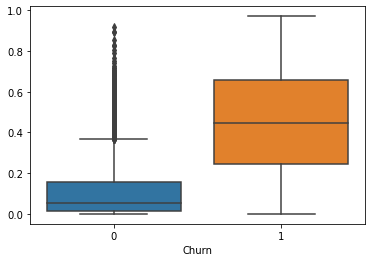

In [291]:
sns.boxplot(x=data['Churn'],y=y_train_predict)
plt.xlabel('Churn');

In [292]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [231]:
from sklearn.metrics import accuracy_score

In [308]:
score =accuracy_score(y_train,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_train,y_class_pred))

Accuracy Score is 0.5588683075361583 

Confusion Matrix 
 [[3167 3388]
 [  89 1238]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.48      0.65      6555
           1       0.27      0.93      0.42      1327

    accuracy                           0.56      7882
   macro avg       0.62      0.71      0.53      7882
weighted avg       0.85      0.56      0.61      7882



AUC: 0.708


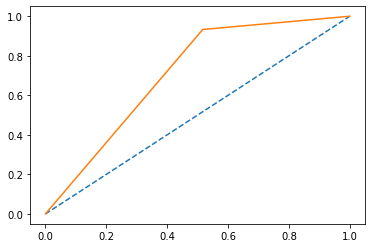

In [310]:
# calculate AUC
auc = roc_auc_score(y_train,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [312]:
y_test_predict = model_3.predict(x_test)
y_test_predict

6888     2.822898e-02
467      4.207621e-03
2347     1.712699e-01
1794     1.397166e-02
3125     4.584520e-01
10078    7.211770e-01
1018     4.655086e-02
5405     1.867262e-01
3690     3.506149e-03
4836     3.771027e-02
6754     6.191273e-01
21       1.029719e-02
6097     5.344744e-03
4810     6.100757e-03
8026     3.058263e-02
2956     2.183536e-02
4366     3.853306e-01
4724     1.893231e-02
6096     5.344981e-01
7676     8.345912e-03
7004     4.013707e-02
24       8.184644e-02
794      4.370541e-03
10585    2.288928e-01
4590     1.803031e-01
9590     1.523322e-01
4854     2.793513e-02
3403     4.610273e-03
4814     1.916833e-02
5048     7.079494e-02
7184     2.927107e-02
3788     7.459518e-02
6383     1.052542e-02
9533     8.662768e-01
8590     9.723132e-03
4773     3.147708e-02
4974     3.485244e-02
6051     2.218244e-01
1482     2.283676e-02
2644     3.763974e-03
3262     3.633096e-02
8147     4.591479e-01
3723     2.248446e-01
2300     1.132945e-03
11150    4.381368e-02
6078     5

In [313]:
y_class_pred=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [316]:
score =accuracy_score(y_test,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test,y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_test,y_class_pred))

Accuracy Score is 0.5645352279455299 

Confusion Matrix 
 [[1388 1421]
 [  50  519]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.49      0.65      2809
           1       0.27      0.91      0.41       569

    accuracy                           0.56      3378
   macro avg       0.62      0.70      0.53      3378
weighted avg       0.85      0.56      0.61      3378



- Recall is amazing on both train and test. However, accurancy for both train and test is below 70% and even precision is very poor. 

AUC: 0.708


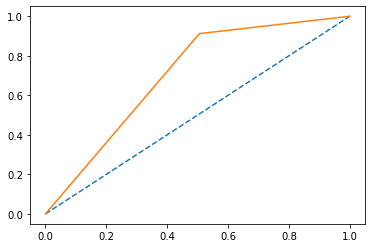

In [318]:
# calculate AUC
test_auc = roc_auc_score(y_test,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Choosing the optimal threshold

In [232]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train,y_train_predict)

In [329]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2364455776667619

#### Validating on the train set with revised threshold

In [330]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.236:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [332]:
score =accuracy_score(y_train,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_train,y_class_pred))

Accuracy Score is 0.832022329358031 

Confusion Matrix 
 [[5540 1015]
 [ 309 1018]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.85      0.89      6555
           1       0.50      0.77      0.61      1327

    accuracy                           0.83      7882
   macro avg       0.72      0.81      0.75      7882
weighted avg       0.87      0.83      0.84      7882



AUC: 0.806


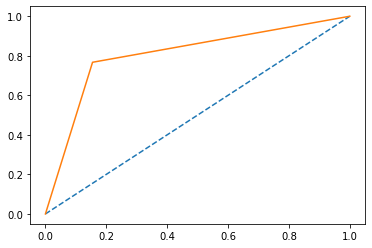

In [334]:
# calculate AUC
auc = roc_auc_score(y_train,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Validating on the test set

In [335]:
y_class_pred=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.236:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [336]:
score =accuracy_score(y_test,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test,y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_test,y_class_pred))

Accuracy Score is 0.822380106571936 

Confusion Matrix 
 [[2366  443]
 [ 157  412]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      2809
           1       0.48      0.72      0.58       569

    accuracy                           0.82      3378
   macro avg       0.71      0.78      0.73      3378
weighted avg       0.86      0.82      0.84      3378



AUC: 0.806


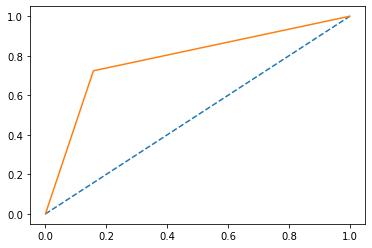

In [338]:
# calculate AUC
test_auc = roc_auc_score(y_test,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Logistic Regression Model_3 with 0.19 threshold

#### Validating on the train set with revised threshold - 0.19

In [343]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [344]:
score =accuracy_score(y_train,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_train,y_class_pred))

Accuracy Score is 0.7984014209591475 

Confusion Matrix 
 [[5220 1335]
 [ 254 1073]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      6555
           1       0.45      0.81      0.57      1327

    accuracy                           0.80      7882
   macro avg       0.70      0.80      0.72      7882
weighted avg       0.87      0.80      0.82      7882



AUC: 0.802


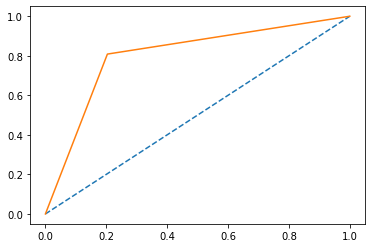

In [346]:
# calculate AUC
auc = roc_auc_score(y_train,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Validating on the test set

In [347]:
y_class_pred=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [348]:
score =accuracy_score(y_test,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test,y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_test,y_class_pred))

Accuracy Score is 0.7859680284191829 

Confusion Matrix 
 [[2220  589]
 [ 134  435]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      2809
           1       0.42      0.76      0.55       569

    accuracy                           0.79      3378
   macro avg       0.68      0.78      0.70      3378
weighted avg       0.86      0.79      0.81      3378



AUC: 0.802


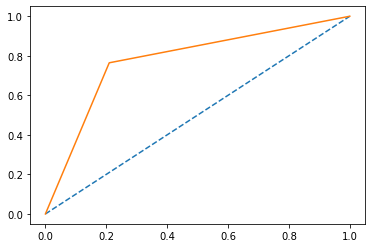

In [350]:
# calculate AUC
test_auc = roc_auc_score(y_test,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

- Now lets remove the variables having VIF > 4 using backward elimination approach. However, we will first remove Service Score and Payment which have been removed from logistic regression model_3 as well.

In [361]:
calc_vif(x).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,Service_Score,18.431150
12,rev_growth_yoy,16.006284
6,Account_user_count,15.347642
15,cashback,11.491915
8,CC_Agent_Score,5.556125
2,CC_Contacted_LY,5.179462
7,account_segment,4.531141
1,City_Tier,4.468440
3,Payment,4.239625
9,Marital_Status,3.929371


In [362]:
a = x.drop('Service_Score', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,rev_growth_yoy,15.087543
5,Account_user_count,12.956904
14,cashback,11.301283
7,CC_Agent_Score,5.476189
2,CC_Contacted_LY,5.127745
6,account_segment,4.504037
1,City_Tier,4.463732
3,Payment,4.236275
8,Marital_Status,3.926495
9,rev_per_month,3.646649


In [363]:
a = a.drop('Payment', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,rev_growth_yoy,14.966750
4,Account_user_count,12.878895
13,cashback,11.255986
6,CC_Agent_Score,5.468772
2,CC_Contacted_LY,5.123238
5,account_segment,4.483614
1,City_Tier,4.133609
7,Marital_Status,3.925833
8,rev_per_month,3.645298
14,Login_device,3.587792


In [364]:
a = a.drop('rev_growth_yoy', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Account_user_count,11.561415
12,cashback,10.970163
6,CC_Agent_Score,5.339027
2,CC_Contacted_LY,4.924645
5,account_segment,4.349533
1,City_Tier,4.105059
7,Marital_Status,3.823866
8,rev_per_month,3.608375
13,Login_device,3.543084
11,Day_Since_CC_connect,3.158834


In [365]:
a = a.drop('Account_user_count', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,cashback,10.070559
5,CC_Agent_Score,5.174071
2,CC_Contacted_LY,4.772456
4,account_segment,4.265545
1,City_Tier,4.015623
6,Marital_Status,3.640525
7,rev_per_month,3.544685
12,Login_device,3.494526
10,Day_Since_CC_connect,3.157137
3,Gender,2.409078


In [366]:
a = a.drop('cashback', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,CC_Agent_Score,5.025993
2,CC_Contacted_LY,4.659483
4,account_segment,4.246705
1,City_Tier,3.872574
6,Marital_Status,3.578171
7,rev_per_month,3.423647
11,Login_device,3.391846
10,Day_Since_CC_connect,2.959164
3,Gender,2.339771
9,coupon_used_for_payment,2.097527


In [367]:
a = a.drop('CC_Agent_Score', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,CC_Contacted_LY,4.529153
4,account_segment,4.149976
1,City_Tier,3.803095
5,Marital_Status,3.514676
6,rev_per_month,3.329685
10,Login_device,3.278954
9,Day_Since_CC_connect,2.919637
3,Gender,2.319159
8,coupon_used_for_payment,2.090762
0,Tenure,2.070826


In [368]:
a = a.drop('CC_Contacted_LY', axis = 1)
calc_vif(a).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,account_segment,3.986927
1,City_Tier,3.709605
4,Marital_Status,3.424698
9,Login_device,3.218454
5,rev_per_month,3.209265
8,Day_Since_CC_connect,2.877247
2,Gender,2.281287
7,coupon_used_for_payment,2.088248
0,Tenure,2.067613
6,Complain_ly,1.350364


Above is the list of variables with VIF < 4. We will now built Logistic Regression model with these variables.

In [370]:
a.columns

Index(['Tenure', 'City_Tier', 'Gender', 'account_segment', 'Marital_Status',
       'rev_per_month', 'Complain_ly', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'Login_device'],
      dtype='object')

In [371]:
a.shape

(11260, 10)

In [372]:
x.shape

(11260, 17)

- We have eliminated 7 variables having high VIF > 4 out of 17 variables (This excludes target variable 'Churn' and non significant variable of 'AccountID'

In [376]:
f_4 = 'Churn ~ Tenure + City_Tier + Gender + account_segment + Marital_Status + rev_per_month + Complain_ly + Day_Since_CC_connect + Login_device'  

In [377]:
model_4 = SM.logit(formula = f_4, data=df1_train).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.330152
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7872
Method:                           MLE   Df Model:                            9
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.2716
Time:                        22:34:35   Log-Likelihood:                -2602.3
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.5645      0.168     -9.286      0.000      -1.895      -1.234
Tenure                  -0.1703      0.007    -24.457      0.000      -0.184      -0.157
City_Tier                0.2941      0.037      7.878      0.000       0.221       0.367
Gender                   0.2583      0.073      3.521      0.000       0.115       0.402
account_segment         -0.3257      0.036     -9.155      0.000      -0.395      -0.256
Marital_Status           0.5436      0.055      9.869      0.000       0.436       0.652
rev_per_month            0.0968      0.010      9.791      0.000       0.077       0.116
Complain_ly              1.4820      0.072     20.463      0.000       1.340       1.624
Day_Since_CC_connect    -0.0835      0.012     -7.088      0.000      -0.107      -0.060
Login_device            -0.3672      0.077     -4.780      0.000      -0.518      -0.217
========================================================================================
"""

As expected all the above variables are having p value <0.05 and hence, these can be determined as significant predictors & the model built using only these variables could perform better when it comes to predicting cases of Churn. 

In [378]:
print('The adjusted pseudo R-square value is',1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.26910786166924794


We see that adjusted pseudo R square of 0.269 is slightly lower to pseudo R square of 0.271, thus suggesting presence of lesser insignificant variables in the model_4. We have also check the multicollinearity of the model_4 using Variance Inflation Factor (VIF) for the predictor variables and that the VIF is < 4 for all these 10 variables. Hence, we shall now built the model and make predictions.

### Prediction on Logistic Regression Model_4 Train Set with 0.19 threshold

Now, let us see the predicted probability values on unscaled data:

In [394]:
y_train_predict = model_4.predict(x_train)
y_train_predict

799      1.211779e-01
7530     2.467144e-01
6908     3.224654e-02
3251     5.767780e-04
5553     2.263015e-01
2578     2.947141e-02
7474     9.798588e-02
851      1.648569e-03
8100     1.484860e-01
6127     1.154435e-01
4426     3.832348e-02
5711     5.294767e-01
11206    2.576319e-02
10485    1.255335e-01
6292     4.279263e-03
8490     4.007562e-01
6555     2.056393e-02
6280     8.385262e-02
9636     1.740740e-02
9734     1.117101e-02
11012    2.393002e-01
7059     6.447893e-02
10539    2.165616e-02
956      1.224363e-01
4993     1.655169e-01
2162     5.234854e-02
10967    4.907754e-03
7514     1.612323e-02
6660     1.281557e-02
5529     6.469569e-01
6293     1.811788e-01
8560     4.529326e-02
6177     7.026490e-02
1427     9.680407e-03
7113     2.680329e-01
3749     7.078777e-02
4246     3.387566e-01
3996     2.987272e-01
7245     1.700206e-02
9563     2.212888e-02
2070     5.053163e-01
9098     2.926543e-02
1121     3.603787e-01
6700     8.490516e-03
6108     1.840938e-02
11066    4

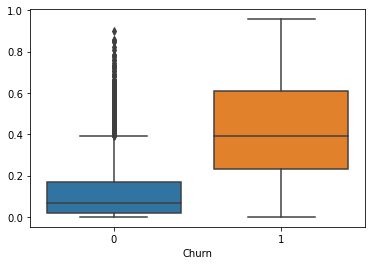

In [395]:
sns.boxplot(x=data['Churn'],y=y_train_predict)
plt.xlabel('Churn');

In [396]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [231]:
from sklearn.metrics import accuracy_score

score =accuracy_score(y_train,y_class_pred)

In [398]:
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_train,y_class_pred))

Accuracy Score is 0.7827962446079675 

Confusion Matrix 
 [[5117 1438]
 [ 274 1053]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      6555
           1       0.42      0.79      0.55      1327

    accuracy                           0.78      7882
   macro avg       0.69      0.79      0.70      7882
weighted avg       0.86      0.78      0.81      7882



AUC: 0.787


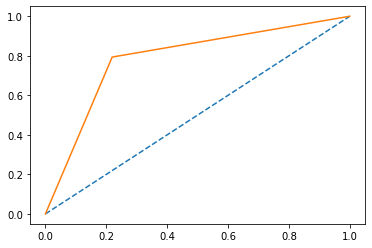

In [400]:
# calculate AUC
auc = roc_auc_score(y_train,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [401]:
y_test_predict = model_4.predict(x_test)
y_test_predict

6888     6.748871e-02
467      9.281393e-03
2347     2.379838e-01
1794     2.161066e-02
3125     5.336930e-01
10078    5.861598e-01
1018     1.835389e-02
5405     2.749547e-01
3690     2.307493e-03
4836     7.588188e-02
6754     4.501790e-01
21       4.722246e-03
6097     1.124121e-02
4810     1.380926e-02
8026     4.993864e-02
2956     2.261520e-02
4366     4.661084e-01
4724     2.004185e-02
6096     4.414333e-01
7676     5.166978e-03
7004     3.844317e-02
24       9.372832e-02
794      6.324817e-03
10585    2.344707e-01
4590     6.807836e-02
9590     1.330083e-01
4854     5.004091e-02
3403     8.600355e-03
4814     3.105337e-02
5048     9.337175e-02
7184     4.069296e-02
3788     1.077187e-01
6383     2.841189e-02
9533     9.264361e-01
8590     7.012621e-03
4773     6.835171e-02
4974     2.801181e-02
6051     2.515234e-01
1482     2.200614e-02
2644     1.710014e-02
3262     2.334720e-02
8147     4.277157e-01
3723     3.248871e-01
2300     1.328470e-03
11150    8.571129e-02
6078     4

In [402]:
y_class_pred=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [403]:
from sklearn.metrics import accuracy_score

score =accuracy_score(y_test,y_class_pred)

In [404]:
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test,y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_test,y_class_pred))

Accuracy Score is 0.7824156305506217 

Confusion Matrix 
 [[2204  605]
 [ 130  439]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.78      0.86      2809
           1       0.42      0.77      0.54       569

    accuracy                           0.78      3378
   macro avg       0.68      0.78      0.70      3378
weighted avg       0.86      0.78      0.80      3378



AUC: 0.787


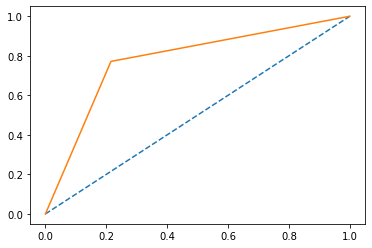

In [406]:
# calculate AUC
test_auc = roc_auc_score(y_test,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Choosing the optimal threshold

In [232]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train,y_train_predict)

In [408]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.21996947594614671

## Logistic Regression Model_4 with 0.219 threshold

#### Validating on the train set with revised threshold

In [409]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.219:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [410]:
score =accuracy_score(y_train,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_train,y_class_pred))

Accuracy Score is 0.8099467140319716 

Confusion Matrix 
 [[5362 1193]
 [ 305 1022]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      6555
           1       0.46      0.77      0.58      1327

    accuracy                           0.81      7882
   macro avg       0.70      0.79      0.73      7882
weighted avg       0.86      0.81      0.83      7882



AUC: 0.794


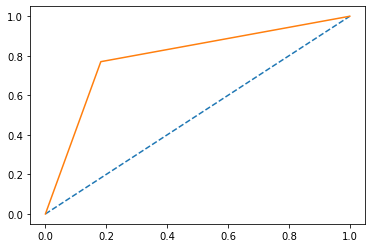

In [412]:
# calculate AUC
auc = roc_auc_score(y_train,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Validating on the test set

In [413]:
y_class_pred=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.219:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [414]:
score =accuracy_score(y_test,y_class_pred)
print('Accuracy Score is', score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test,y_class_pred),'\n')
print('Classification Report','\n', metrics.classification_report(y_test,y_class_pred))

Accuracy Score is 0.8058022498519835 

Confusion Matrix 
 [[2297  512]
 [ 144  425]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      2809
           1       0.45      0.75      0.56       569

    accuracy                           0.81      3378
   macro avg       0.70      0.78      0.72      3378
weighted avg       0.86      0.81      0.82      3378



AUC: 0.794


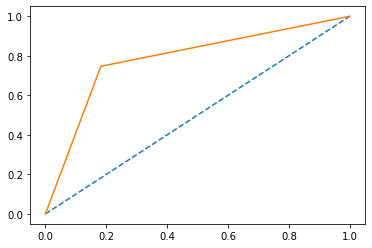

In [416]:
# calculate AUC
test_auc = roc_auc_score(y_test,y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Random Forest Model (unscaled data and with outliers - xo_train & xo_test)

In [265]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=501, random_state=1)
rf_model.fit(xo_train, yo_train)

### Prediction on Train set

In [235]:
y_train_predict = rf_model.predict(xo_train)
model_score = rf_model.score(xo_train, yo_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_train, y_train_predict))

Accuracy Score is 1.0 

Confusion Matrix 
 [[6555    0]
 [   0 1327]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


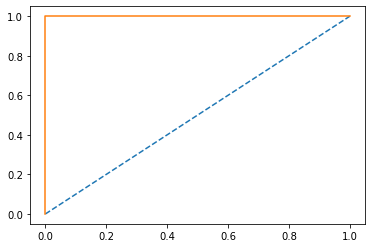

In [239]:
# predict probabilities
probs = rf_model.predict_proba(xo_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [240]:
y_test_predict = rf_model.predict(xo_test)
model_score = rf_model.score(xo_test, yo_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_test, y_test_predict))

Accuracy Score is 0.9727649496743636 

Confusion Matrix 
 [[2800    9]
 [  83  486]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.98      0.85      0.91       569

    accuracy                           0.97      3378
   macro avg       0.98      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



AUC: 0.993


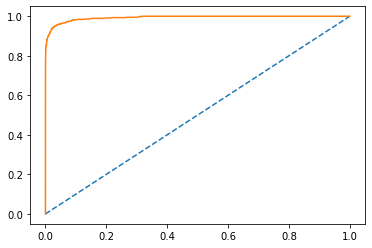

In [243]:
# predict probabilities
probs = rf_model.predict_proba(xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

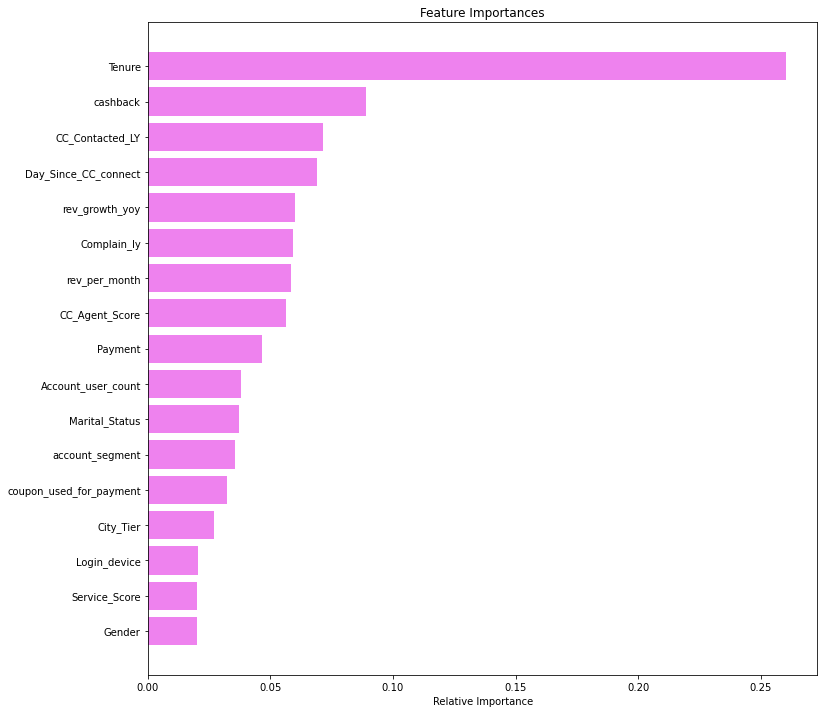

In [246]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(xo.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Grid Search for finding out the optimal values for the hyper parameters

Since we are more interested in correctly classifying 1 (Churned) than 0 (not Churned). 

From the Random Forest model,looking at the Accuracy,Sensitivity,Speficity,Recall and AUC, we have 100% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1 for both the above models.  
 
This is because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

In this model, we have hard-coded the hyper parameter values. We can optimize/fine-tune the random forest model, by trying different values for the hyper parameters to see if the model performance is improving.

In [234]:
from sklearn.model_selection import GridSearchCV

## Random Forest Model3 (unscaled data and with outliers - xo_train & xo_test)

In [357]:
param_grid = {
    'max_depth': [50,60],
    'min_samples_leaf': [4,5,7],
    'min_samples_split': [10,15,20],
    'n_estimators': [20,30,40]
}

rf_model3 = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rf_model3, param_grid = param_grid)

In [358]:
grid_search.fit(xo_train, yo_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [50, 60], 'min_samples_leaf': [4, 5, 7],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [20, 30, 40]})

In [359]:
grid_search.best_params_

{'max_depth': 50,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 40}

In [360]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [361]:
y_train_predict = best_grid.predict(xo_train)
model_score = best_grid.score(xo_train, yo_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_train, y_train_predict))

Accuracy Score is 0.9748794722151738 

Confusion Matrix 
 [[6545   10]
 [ 188 1139]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      6555
           1       0.99      0.86      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.98      0.93      0.95      7882
weighted avg       0.98      0.97      0.97      7882



AUC: 0.998


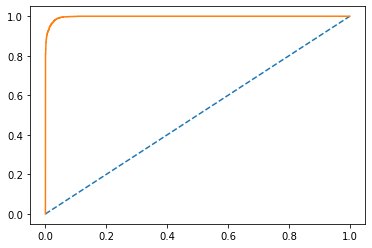

In [363]:
# predict probabilities
probs = best_grid.predict_proba(xo_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [364]:
y_test_predict = best_grid.predict(xo_test)
model_score = best_grid.score(xo_test, yo_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_test, y_test_predict))

Accuracy Score is 0.9502664298401421 

Confusion Matrix 
 [[2789   20]
 [ 148  421]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.95      0.74      0.83       569

    accuracy                           0.95      3378
   macro avg       0.95      0.87      0.90      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 0.979


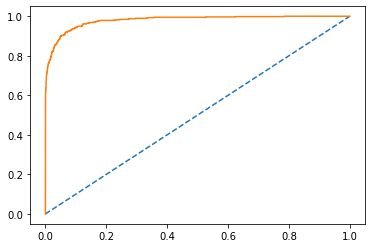

In [366]:
# predict probabilities
probs = best_grid.predict_proba(xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

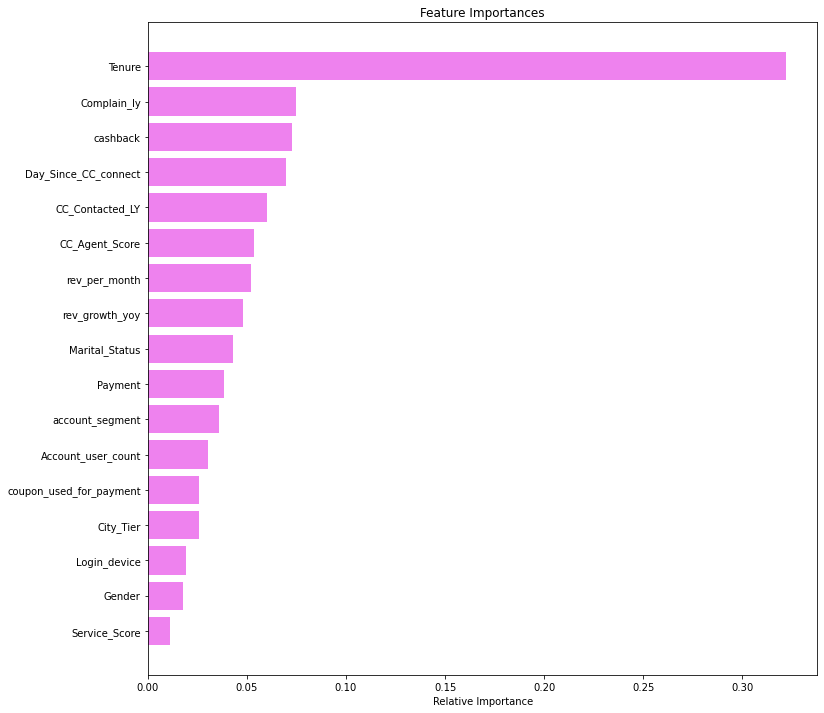

In [367]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(xo.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Model4 (unscaled data and with outliers - xo_train & xo_test)

In [338]:
param_grid = {
    'max_depth': [30,45,50],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [10,15,20],
    'n_estimators': [30,40,50]
}

rf_model4 = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rf_model4, param_grid = param_grid)

In [339]:
grid_search.fit(xo_train, yo_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [30, 45, 50],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [30, 40, 50]})

In [340]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 40}

In [341]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [342]:
y_train_predict = best_grid.predict(xo_train)
model_score = best_grid.score(xo_train, yo_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_train, y_train_predict))

Accuracy Score is 0.9689165186500888 

Confusion Matrix 
 [[6534   21]
 [ 224 1103]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      6555
           1       0.98      0.83      0.90      1327

    accuracy                           0.97      7882
   macro avg       0.97      0.91      0.94      7882
weighted avg       0.97      0.97      0.97      7882



AUC: 0.996


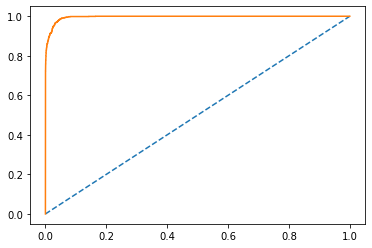

In [344]:
# predict probabilities
probs = best_grid.predict_proba(xo_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [345]:
y_test_predict = best_grid.predict(xo_test)
model_score = best_grid.score(xo_test, yo_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_test, y_test_predict))

Accuracy Score is 0.9461219656601539 

Confusion Matrix 
 [[2784   25]
 [ 157  412]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.94      0.72      0.82       569

    accuracy                           0.95      3378
   macro avg       0.94      0.86      0.89      3378
weighted avg       0.95      0.95      0.94      3378



AUC: 0.976


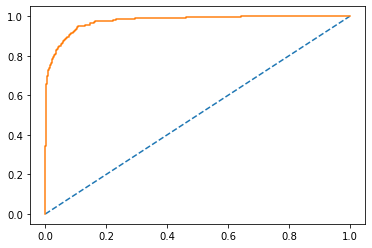

In [347]:
# predict probabilities
probs = best_grid.predict_proba(xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

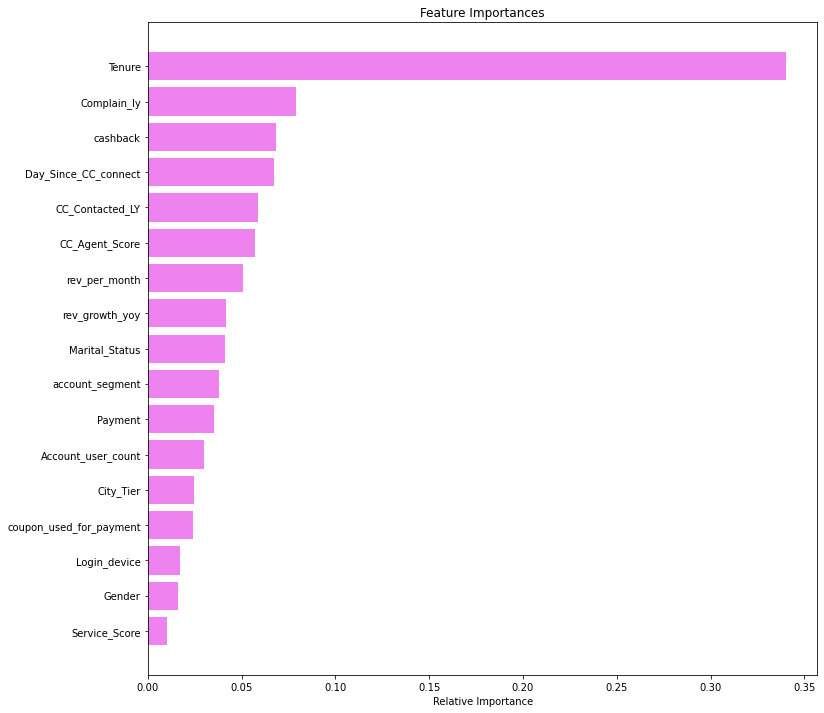

In [348]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(xo.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Model5 (unscaled data and with outliers - xo_train & xo_test)

In [368]:
param_grid = {
    'max_depth': [30,40,50],
    'min_samples_leaf': [4,5,7],
    'min_samples_split': [4,7,10],
    'n_estimators': [40,45,50]
}

rf_model5 = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rf_model5, param_grid = param_grid)

In [369]:
grid_search.fit(xo_train, yo_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [30, 40, 50],
                         'min_samples_leaf': [4, 5, 7],
                         'min_samples_split': [4, 7, 10],
                         'n_estimators': [40, 45, 50]})

In [370]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [371]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [372]:
y_train_predict = best_grid.predict(xo_train)
model_score = best_grid.score(xo_train, yo_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_train, y_train_predict))

Accuracy Score is 0.9765287997970058 

Confusion Matrix 
 [[6541   14]
 [ 171 1156]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      6555
           1       0.99      0.87      0.93      1327

    accuracy                           0.98      7882
   macro avg       0.98      0.93      0.96      7882
weighted avg       0.98      0.98      0.98      7882



AUC: 0.998


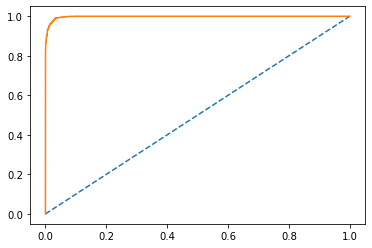

In [374]:
# predict probabilities
probs = best_grid.predict_proba(xo_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [375]:
y_test_predict = best_grid.predict(xo_test)
model_score = best_grid.score(xo_test, yo_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_test, y_test_predict))

Accuracy Score is 0.9520426287744227 

Confusion Matrix 
 [[2788   21]
 [ 141  428]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.95      0.75      0.84       569

    accuracy                           0.95      3378
   macro avg       0.95      0.87      0.91      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 0.978


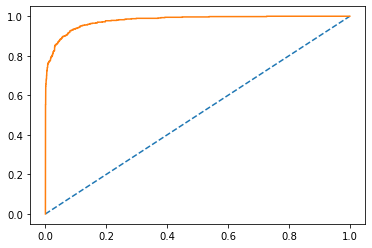

In [377]:
# predict probabilities
probs = best_grid.predict_proba(xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

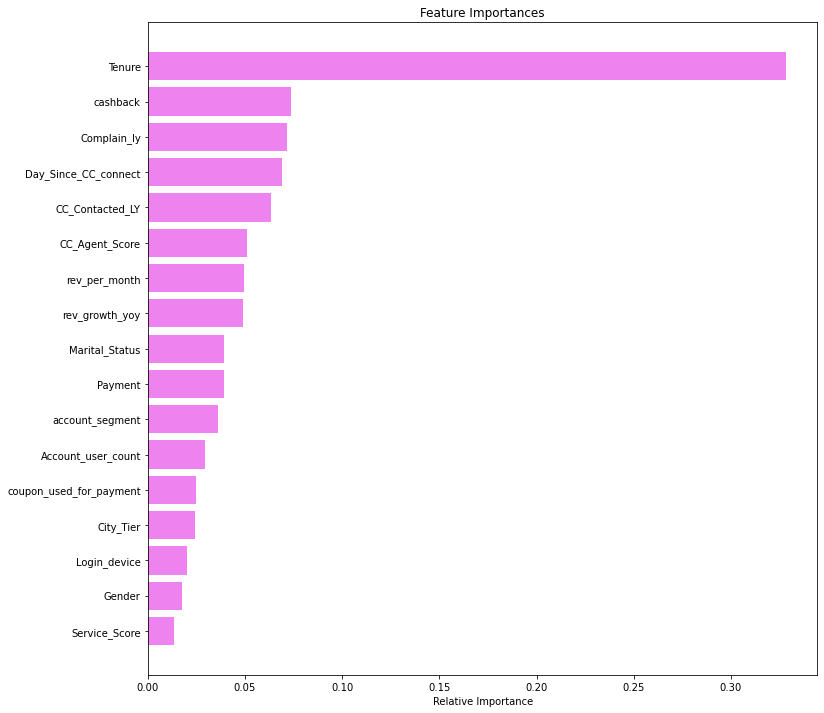

In [378]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(xo.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Here, we can see that even when we try other values for the hyper parameters, the model performance is not improving much. But it is still a good model but sligthly over fitting.

In [312]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_grid, xo_train, yo_train, cv=10)
scores

array([0.92395437, 0.94043093, 0.94923858, 0.93020305, 0.92893401,
       0.94796954, 0.93401015, 0.94162437, 0.93654822, 0.94416244])

In [313]:
scores = cross_val_score(best_grid, xo_test, yo_test, cv=10)
scores

array([0.93195266, 0.91420118, 0.90532544, 0.91715976, 0.9112426 ,
       0.91715976, 0.92011834, 0.91715976, 0.90207715, 0.9347181 ])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

## Random Forest Model5 with SMOTE (unscaled data and with outliers - xo_train_res & xo_test)

In [317]:
best_grid.fit(xo_train_res, yo_train_res)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=50, random_state=1)

### Prediction on Train set

In [318]:
y_train_predict = best_grid.predict(xo_train_res)
model_score = best_grid.score(xo_train_res, yo_train_res)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_train_res, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_train_res, y_train_predict))

Accuracy Score is 0.9811838893409276 

Confusion Matrix 
 [[6490   65]
 [ 120 3157]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.98      0.96      0.97      3277

    accuracy                           0.98      9832
   macro avg       0.98      0.98      0.98      9832
weighted avg       0.98      0.98      0.98      9832



AUC: 0.999


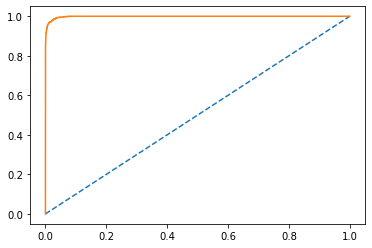

In [319]:
# predict probabilities
probs = best_grid.predict_proba(xo_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [317]:
y_test_predict = best_grid.predict(xo_test)
model_score = best_grid.score(xo_test, yo_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_test, y_test_predict))

Accuracy Score is 0.9487862640615748 

Confusion Matrix 
 [[2719   90]
 [  83  486]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.84      0.85      0.85       569

    accuracy                           0.95      3378
   macro avg       0.91      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 0.979


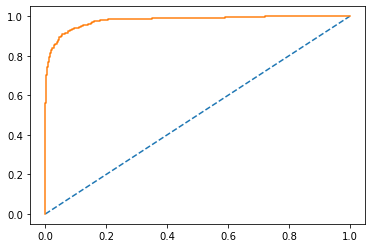

In [318]:
# predict probabilities
probs = best_grid.predict_proba(xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

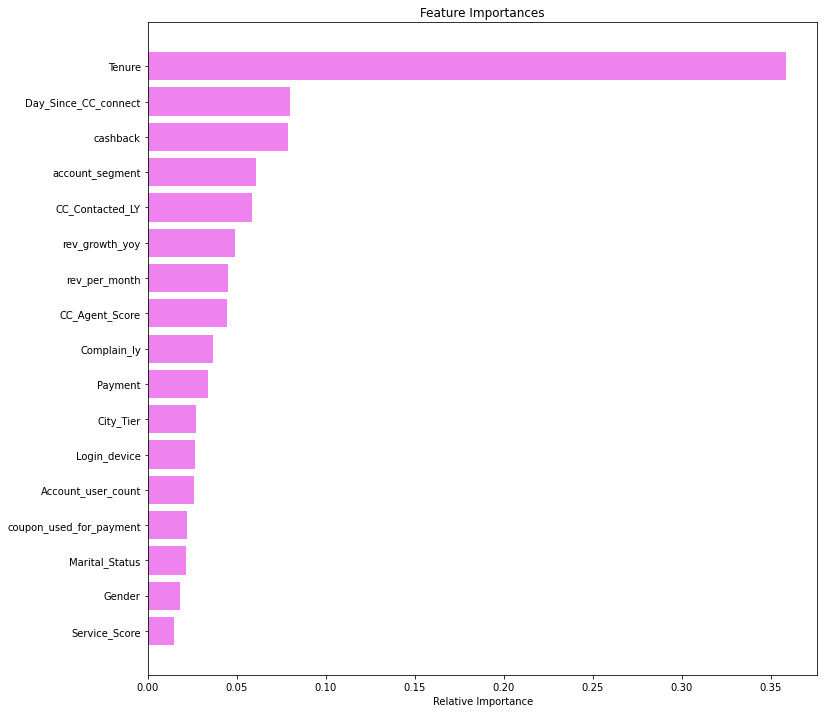

In [319]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(xo_train_res.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [320]:
scores = cross_val_score(best_grid, xo_train_res, yo_train_res, cv=10)
scores

array([0.93191057, 0.94105691, 0.93997965, 0.94303154, 0.93489318,
       0.93489318, 0.92573754, 0.93997965, 0.91963377, 0.95523906])

In [322]:
scores = cross_val_score(best_grid, xo_test, yo_test, cv=10)
scores

array([0.93195266, 0.91420118, 0.90532544, 0.91715976, 0.9112426 ,
       0.91715976, 0.92011834, 0.91715976, 0.90207715, 0.9347181 ])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

## Random Forest Model6 (unscaled data and with outliers - xo_train & xo_test)

In [268]:
param_grid = {
    'max_depth': [60, 70, 80, 90, 100],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6],
    'n_estimators': [50,60,70,80,100],
    'bootstrap': [True, False],
}

rf_model6 = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rf_model6, param_grid = param_grid, cv = 3)

In [269]:
grid_search.fit(xo_train, yo_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [60, 70, 80, 90, 100],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 60, 70, 80, 100]})

In [270]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 70}

In [271]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [272]:
y_train_predict = best_grid.predict(xo_train)
model_score = best_grid.score(xo_train, yo_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_train, y_train_predict))

Accuracy Score is 0.9997462572951028 

Confusion Matrix 
 [[6555    0]
 [   2 1325]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


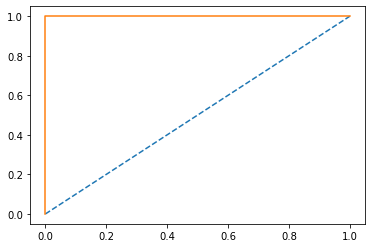

In [273]:
# predict probabilities
probs = best_grid.predict_proba(xo_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [274]:
y_test_predict = best_grid.predict(xo_test)
model_score = best_grid.score(xo_test, yo_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(yo_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(yo_test, y_test_predict))

Accuracy Score is 0.9769094138543517 

Confusion Matrix 
 [[2802    7]
 [  71  498]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2809
           1       0.99      0.88      0.93       569

    accuracy                           0.98      3378
   macro avg       0.98      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378



AUC: 0.994


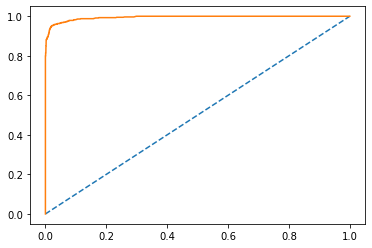

In [275]:
# predict probabilities
probs = best_grid.predict_proba(xo_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(yo_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yo_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

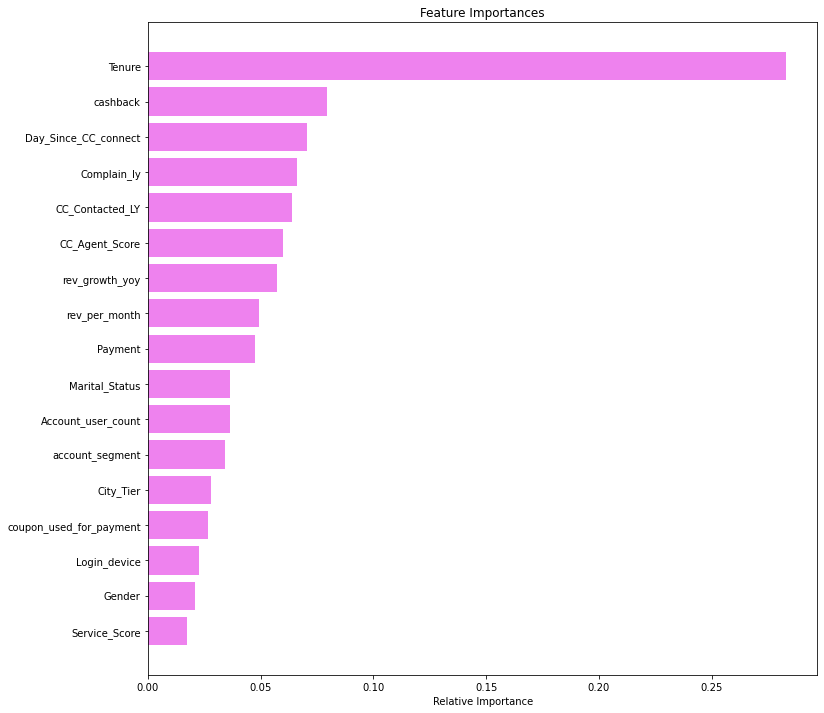

In [276]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(xo.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Here, we can see that even when we try other values for the hyper parameters, the model performance is not improving much. But it is still a good model but sligthly over fitting.

In [277]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_grid, xo_train, yo_train, cv=10)
scores

array([0.96451204, 0.97718631, 0.97969543, 0.96827411, 0.96954315,
       0.9822335 , 0.95431472, 0.97081218, 0.96573604, 0.97715736])

In [279]:
scores = cross_val_score(best_grid, xo_test, yo_test, cv=10)
scores

array([0.94970414, 0.9112426 , 0.90236686, 0.9408284 , 0.92011834,
       0.93195266, 0.94674556, 0.9408284 , 0.90207715, 0.94065282])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

## Creating a Train Test Split on scaled datatset of x and fitting it to SMOTE

In [250]:
xscaled = sc.fit_transform(x)

In [251]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xscaled, y, test_size= 0.30, random_state=1, stratify= data['Churn'])

In [252]:
# Checking dimensions on the train and test data
print('xs_train: ',xs_train.shape)
print('xs_test: ',xs_test.shape)
print('ys_train: ',ys_train.shape)
print('ys_test: ',ys_test.shape)

xs_train:  (7882, 17)
xs_test:  (3378, 17)
ys_train:  (7882,)
ys_test:  (3378,)


In [255]:
xs_train_res, ys_train_res = sm.fit_resample(xs_train, ys_train)

## KNN Model (scaled dataset without Outliers - x_scaled_train & x_test)

In [309]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_scaled_train,y_train)

KNeighborsClassifier()

### Prediction on Train set

In [428]:
y_train_predict = KNN_model.predict(x_scaled_train)
model_score = KNN_model.score(x_scaled_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9775437706165948 

Confusion Matrix 
 [[6512   43]
 [ 134 1193]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.97      0.90      0.93      1327

    accuracy                           0.98      7882
   macro avg       0.97      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882



AUC: 0.996


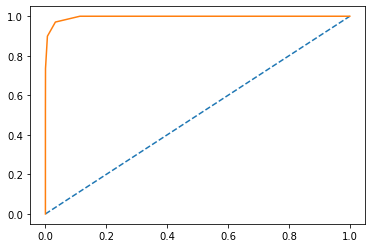

In [430]:
# predict probabilities
probs = KNN_model.predict_proba(x_scaled_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [431]:
y_test_predict = KNN_model.predict(x_scaled_test)
model_score = KNN_model.score(x_scaled_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9490822972172883 

Confusion Matrix 
 [[2753   56]
 [ 116  453]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.89      0.80      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 0.996


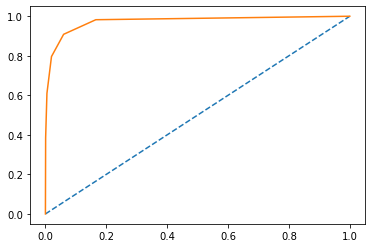

In [433]:
# predict probabilities
probs = KNN_model.predict_proba(x_scaled_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [310]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, x_scaled_train, y_train, cv=10)
scores

array([0.9391635 , 0.9531052 , 0.94162437, 0.94923858, 0.94416244,
       0.95939086, 0.93020305, 0.95177665, 0.95050761, 0.95812183])

In [311]:
scores = cross_val_score(KNN_model, x_scaled_test, y_test, cv=10)
scores

array([0.8816568 , 0.86390533, 0.88461538, 0.90828402, 0.86094675,
       0.8964497 , 0.8964497 , 0.86390533, 0.87240356, 0.92284866])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

## KNN with SMOTE (Scaled Dataset without Outliers - xs_train_res &  xs_test)

In [353]:
KNN_SMOTE = KNN_model.fit(xs_train_res, ys_train_res)

### Prediction on Train set

In [354]:
y_train_predict = KNN_SMOTE.predict(xs_train_res)
model_score = KNN_SMOTE.score(xs_train_res, ys_train_res)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(ys_train_res, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(ys_train_res, y_train_predict))

Accuracy Score is 0.9792514239218877 

Confusion Matrix 
 [[6376  179]
 [  25 3252]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      6555
           1       0.95      0.99      0.97      3277

    accuracy                           0.98      9832
   macro avg       0.97      0.98      0.98      9832
weighted avg       0.98      0.98      0.98      9832



AUC: 0.999


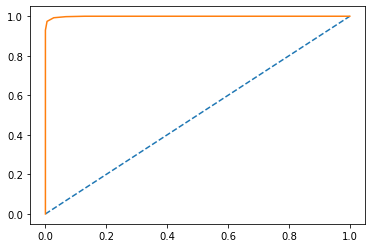

In [355]:
# predict probabilities
probs = KNN_SMOTE.predict_proba(xs_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(ys_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(ys_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [356]:
y_test_predict = KNN_SMOTE.predict(xs_test)
model_score = KNN_SMOTE.score(xs_test, ys_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(ys_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(ys_test, y_test_predict))

Accuracy Score is 0.9393132030787448 

Confusion Matrix 
 [[2644  165]
 [  40  529]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2809
           1       0.76      0.93      0.84       569

    accuracy                           0.94      3378
   macro avg       0.87      0.94      0.90      3378
weighted avg       0.95      0.94      0.94      3378



AUC: 0.999


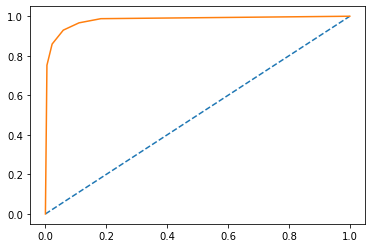

In [357]:
# predict probabilities
probs = KNN_SMOTE.predict_proba(xs_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(ys_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(ys_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [358]:
scores = cross_val_score(KNN_SMOTE, xs_train_res, ys_train_res, cv=10)
scores

array([0.94308943, 0.95020325, 0.95116989, 0.95218718, 0.95523906,
       0.9664293 , 0.95727365, 0.95422177, 0.95320448, 0.95523906])

In [359]:
scores = cross_val_score(KNN_SMOTE, xs_test, ys_test, cv=10)
scores

array([0.8816568 , 0.86390533, 0.88461538, 0.9112426 , 0.86094675,
       0.89940828, 0.89940828, 0.86390533, 0.87240356, 0.92284866])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid. However, we cant extract imp features for KNN models.

## SVM Model (scaled dataset without Outliers - x_scaled_train & x_test)

In [236]:
from sklearn import svm

In [285]:
svm = svm.SVC(probability=True, random_state = 1)

svm.fit(x_scaled_train, y_train)

SVC(probability=True, random_state=1)

### Prediction on Train set

In [286]:
y_train_predict = svm.predict(x_scaled_train)
model_score = svm.score(x_scaled_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9412585638162903 

Confusion Matrix 
 [[6502   53]
 [ 410  917]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      6555
           1       0.95      0.69      0.80      1327

    accuracy                           0.94      7882
   macro avg       0.94      0.84      0.88      7882
weighted avg       0.94      0.94      0.94      7882



AUC: 0.965


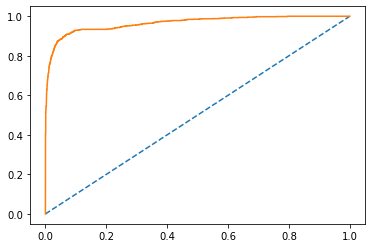

In [287]:
# predict probabilities
probs = svm.predict_proba(x_scaled_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [288]:
y_test_predict = svm.predict(x_scaled_test)
model_score = svm.score(x_scaled_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9354647720544701 

Confusion Matrix 
 [[2791   18]
 [ 200  369]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2809
           1       0.95      0.65      0.77       569

    accuracy                           0.94      3378
   macro avg       0.94      0.82      0.87      3378
weighted avg       0.94      0.94      0.93      3378



AUC: 0.939


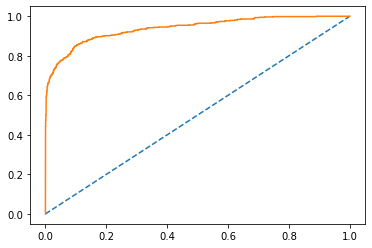

In [289]:
# predict probabilities
probs = svm.predict_proba(x_scaled_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

## SVM Tuned Model (scaled dataset without Outliers - x_scaled_train & x_test)

In [237]:
param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['poly','rbf','linear','sigmoid']
}

svm = svm.SVC(probability=True, random_state = 1)

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid)

In [238]:
grid_search.fit(x_scaled_train, y_train)

GridSearchCV(estimator=SVC(probability=True, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']})

In [239]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [240]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [241]:
y_train_predict = best_grid.predict(x_scaled_train)
model_score = best_grid.score(x_scaled_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9982238010657194 

Confusion Matrix 
 [[6552    3]
 [  11 1316]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      0.99      0.99      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 0.999


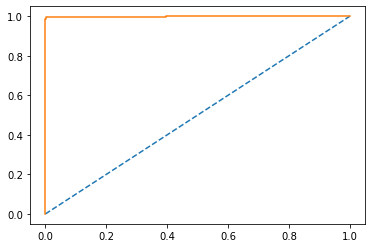

In [242]:
# predict probabilities
probs = best_grid.predict_proba(x_scaled_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [243]:
y_test_predict = best_grid.predict(x_scaled_test)
model_score = best_grid.score(x_scaled_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9763173475429248 

Confusion Matrix 
 [[2782   27]
 [  53  516]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2809
           1       0.95      0.91      0.93       569

    accuracy                           0.98      3378
   macro avg       0.97      0.95      0.96      3378
weighted avg       0.98      0.98      0.98      3378



AUC: 0.990


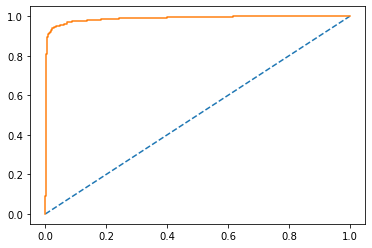

In [244]:
# predict probabilities
probs = best_grid.predict_proba(x_scaled_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [245]:
scores = cross_val_score(best_grid, x_scaled_train, y_train, cv=10)
scores

array([0.96831432, 0.97338403, 0.96827411, 0.96319797, 0.98350254,
       0.9784264 , 0.96827411, 0.9822335 , 0.97461929, 0.98604061])

In [247]:
scores = cross_val_score(best_grid, x_scaled_test, y_test, cv=10)
scores

array([0.94970414, 0.9260355 , 0.89940828, 0.94674556, 0.9112426 ,
       0.93786982, 0.94378698, 0.93195266, 0.91097923, 0.96142433])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

## SVM with SMOTE (Scaled Dataset without Outliers - xs_train_res &  xs_test)

In [340]:
svm_SMOTE = svm.fit(xs_train_res, ys_train_res)

### Prediction on Train set

In [341]:
y_train_predict = svm_SMOTE.predict(xs_train_res)
model_score = svm_SMOTE.score(xs_train_res, ys_train_res)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(ys_train_res, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(ys_train_res, y_train_predict))

Accuracy Score is 0.9493490642799024 

Confusion Matrix 
 [[6312  243]
 [ 255 3022]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6555
           1       0.93      0.92      0.92      3277

    accuracy                           0.95      9832
   macro avg       0.94      0.94      0.94      9832
weighted avg       0.95      0.95      0.95      9832



AUC: 0.986


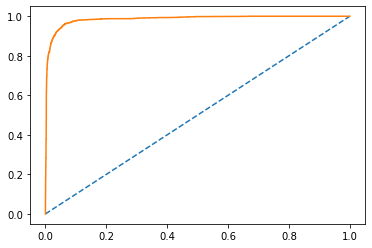

In [342]:
# predict probabilities
probs = svm_SMOTE.predict_proba(xs_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(ys_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(ys_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [343]:
y_test_predict = svm_SMOTE.predict(xs_test)
model_score = svm_SMOTE.score(xs_test, ys_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(ys_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(ys_test, y_test_predict))

Accuracy Score is 0.92599171107164 

Confusion Matrix 
 [[2664  145]
 [ 105  464]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2809
           1       0.76      0.82      0.79       569

    accuracy                           0.93      3378
   macro avg       0.86      0.88      0.87      3378
weighted avg       0.93      0.93      0.93      3378



AUC: 0.986


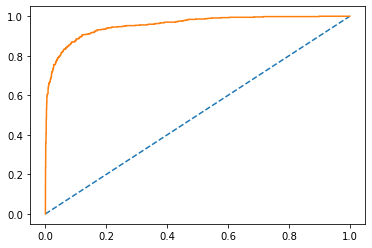

In [344]:
# predict probabilities
probs = svm_SMOTE.predict_proba(xs_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(ys_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(ys_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [346]:
scores = cross_val_score(svm_SMOTE, xs_train_res, ys_train_res, cv=10)
scores

array([0.91666667, 0.92682927, 0.92370295, 0.92777213, 0.92675483,
       0.94303154, 0.93692777, 0.94608342, 0.92980671, 0.95015259])

In [347]:
scores = cross_val_score(svm_SMOTE, xs_test, ys_test, cv=10)
scores

array([0.90828402, 0.89940828, 0.88757396, 0.92011834, 0.90236686,
       0.90828402, 0.90236686, 0.89349112, 0.89614243, 0.91394659])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid. However, we cant extract imp features for svm models.

## CART (Unscaled Dataset without Outliers - x_train &  x_test)

In [455]:
from sklearn import tree


dt = tree.DecisionTreeClassifier(random_state=1)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

### Prediction on Train set

In [456]:
y_train_predict = dt.predict(x_train)
model_score = dt.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 1.0 

Confusion Matrix 
 [[6555    0]
 [   0 1327]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


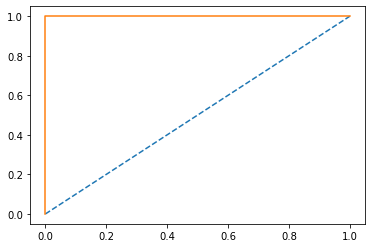

In [457]:
# predict probabilities
probs = dt.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [461]:
y_test_predict = dt.predict(x_test)
model_score = dt.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.948194197750148 

Confusion Matrix 
 [[2721   88]
 [  87  482]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.85      0.85      0.85       569

    accuracy                           0.95      3378
   macro avg       0.91      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 1.000


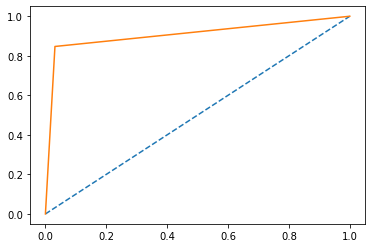

In [462]:
# predict probabilities
probs = dt.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## CART Tuned (Unscaled Dataset without Outliers - x_train &  x_test)

In [559]:
from sklearn import tree

dt_tuned = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 4, random_state=1)
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=1)

### Prediction on Train set

In [560]:
y_train_predict = dt_tuned.predict(x_train)
model_score = dt_tuned.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9723420451662015 

Confusion Matrix 
 [[6487   68]
 [ 150 1177]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6555
           1       0.95      0.89      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882



AUC: 0.997


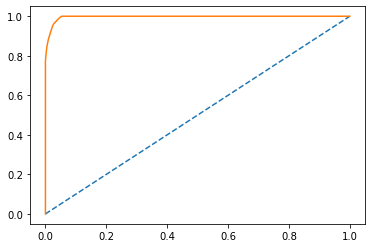

In [561]:
# predict probabilities
probs = dt_tuned.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [562]:
y_test_predict = dt_tuned.predict(x_test)
model_score = dt_tuned.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9363528715216104 

Confusion Matrix 
 [[2718   91]
 [ 124  445]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2809
           1       0.83      0.78      0.81       569

    accuracy                           0.94      3378
   macro avg       0.89      0.87      0.88      3378
weighted avg       0.94      0.94      0.94      3378



AUC: 0.997


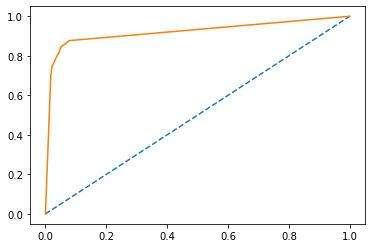

In [563]:
# predict probabilities
probs = dt_tuned.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

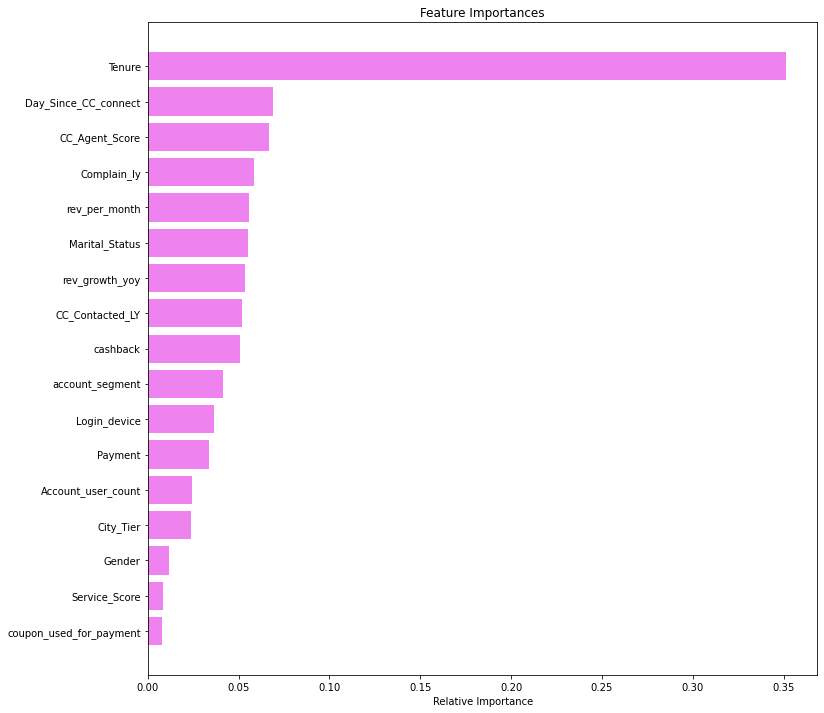

In [564]:
importances = dt_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [570]:
scores = cross_val_score(dt_tuned, x_train, y_train, cv=10)
scores

array([0.9252218 , 0.91634981, 0.92258883, 0.94035533, 0.92893401,
       0.93527919, 0.90736041, 0.91751269, 0.93020305, 0.92766497])

In [301]:
scores = cross_val_score(dt_tuned, x_test, y_test, cv=10)
scores

array([0.8964497 , 0.86982249, 0.86686391, 0.87869822, 0.86390533,
       0.91420118, 0.90828402, 0.87869822, 0.87240356, 0.88130564])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

## CART Tuned with SMOTE (Unscaled Dataset without Outliers - x_train_res &  x_test)

In [267]:
dt_tuned_SMOTE = dt_tuned.fit(x_train_res, y_train_res)

### Prediction on Train set

In [268]:
y_train_predict = dt_tuned_SMOTE.predict(x_train_res)
model_score = dt_tuned_SMOTE.score(x_train_res, y_train_res)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train_res, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train_res, y_train_predict))

Accuracy Score is 0.9683685923515053 

Confusion Matrix 
 [[6468   87]
 [ 224 3053]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      6555
           1       0.97      0.93      0.95      3277

    accuracy                           0.97      9832
   macro avg       0.97      0.96      0.96      9832
weighted avg       0.97      0.97      0.97      9832



AUC: 0.997


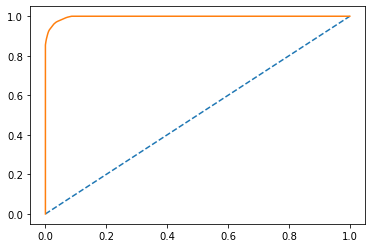

In [269]:
# predict probabilities
probs = dt_tuned_SMOTE.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [270]:
y_test_predict = dt_tuned_SMOTE.predict(x_test)
model_score = dt_tuned_SMOTE.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9233274126702191 

Confusion Matrix 
 [[2676  133]
 [ 126  443]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2809
           1       0.77      0.78      0.77       569

    accuracy                           0.92      3378
   macro avg       0.86      0.87      0.86      3378
weighted avg       0.92      0.92      0.92      3378



AUC: 0.997


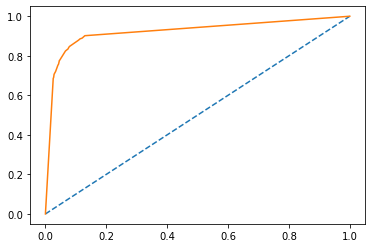

In [271]:
# predict probabilities
probs = dt_tuned_SMOTE.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

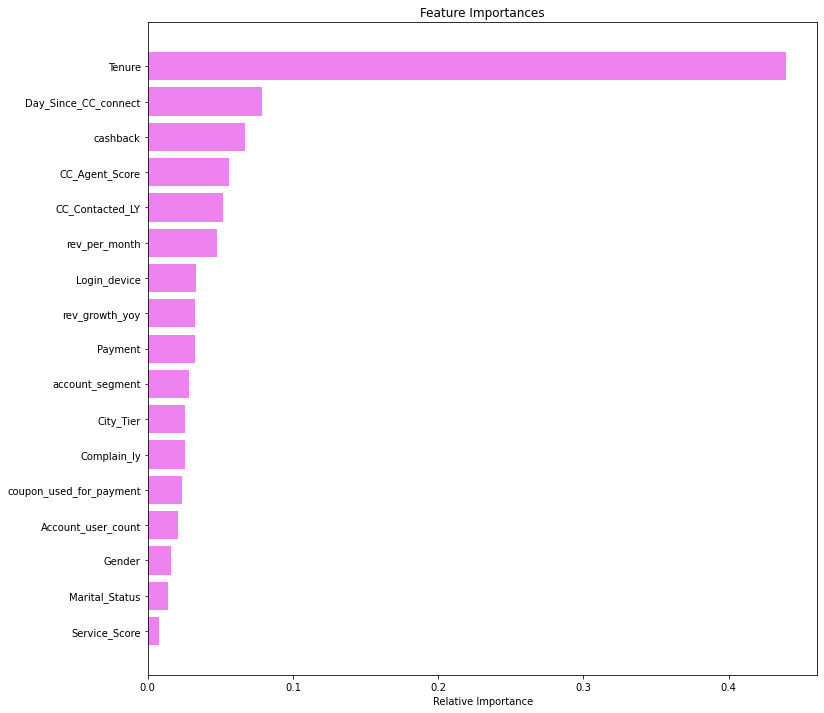

In [273]:
importances = dt_tuned_SMOTE.feature_importances_
indices = np.argsort(importances)
feature_names = list(x_train_res.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [274]:
scores = cross_val_score(dt_tuned_SMOTE, x_train_res, y_train_res, cv=10)
scores

array([0.8902439 , 0.89837398, 0.89928789, 0.90946083, 0.92268566,
       0.91149542, 0.90539166, 0.92166836, 0.90640895, 0.92370295])

In [275]:
scores = cross_val_score(dt_tuned_SMOTE, x_test, y_test, cv=10)
scores

array([0.8964497 , 0.86982249, 0.86686391, 0.87869822, 0.86390533,
       0.91420118, 0.90828402, 0.87869822, 0.87240356, 0.88130564])

## Emsemble Techniques

## Bagging (unscaled data and without outliers - x_train & x_test)

In [585]:
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=dt_tuned,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=4,
                                                        random_state=1),
                  n_estimators=100, random_state=1)

### Prediction on Train set

In [586]:
y_train_predict = Bagging_model.predict(x_train)
model_score = Bagging_model.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9843948236488201 

Confusion Matrix 
 [[6540   15]
 [ 108 1219]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6555
           1       0.99      0.92      0.95      1327

    accuracy                           0.98      7882
   macro avg       0.99      0.96      0.97      7882
weighted avg       0.98      0.98      0.98      7882



AUC: 0.999


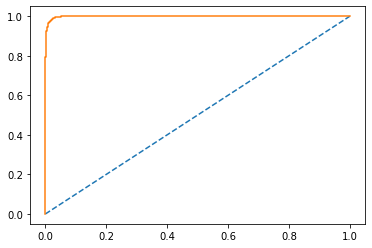

In [587]:
# predict probabilities
probs = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [588]:
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9526346950858496 

Confusion Matrix 
 [[2771   38]
 [ 122  447]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2809
           1       0.92      0.79      0.85       569

    accuracy                           0.95      3378
   macro avg       0.94      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 0.979


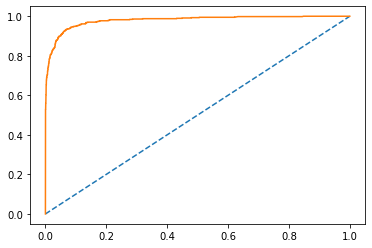

In [589]:
# predict probabilities
probs = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [590]:
scores = cross_val_score(Bagging_model, x_train, y_train, cv=10)
scores

array([0.93409379, 0.94930292, 0.9606599 , 0.94543147, 0.93401015,
       0.95431472, 0.93401015, 0.94416244, 0.9428934 , 0.95177665])

In [591]:
scores = cross_val_score(Bagging_model, x_test, y_test, cv=10)
scores

array([0.93491124, 0.90236686, 0.89940828, 0.91420118, 0.90828402,
       0.9260355 , 0.9260355 , 0.9260355 , 0.90207715, 0.93175074])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

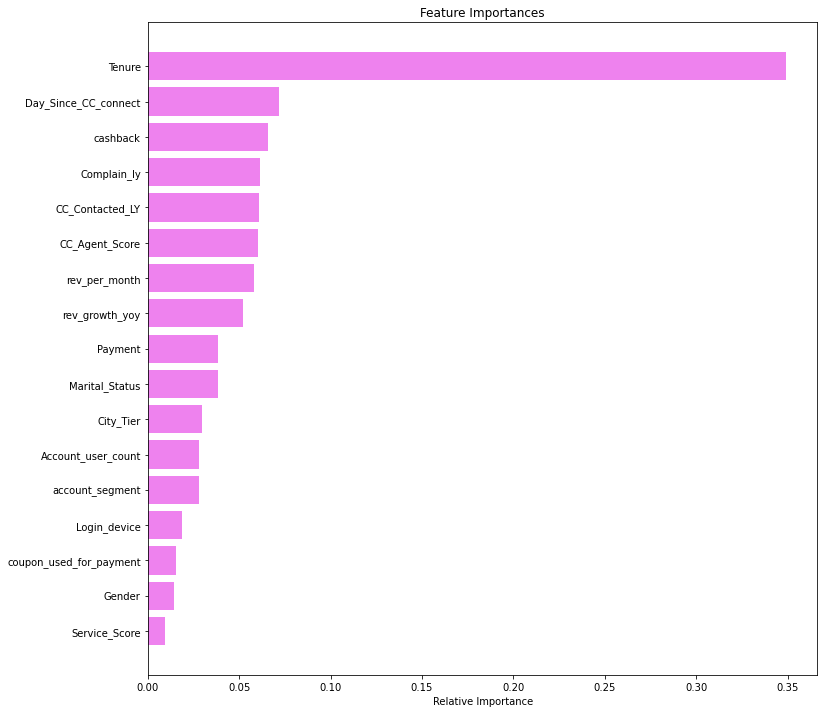

In [293]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in Bagging_model.estimators_
], axis=0)
importances = feature_importances
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Bagging with SMOTE (unscaled data and without outliers - x_train_res & x_test)

In [259]:
Bagging_model_SMOTE = Bagging_model.fit(x_train_res, y_train_res)

### Prediction on Train set

In [260]:
y_train_predict = Bagging_model_SMOTE.predict(x_train_res)
model_score = Bagging_model_SMOTE.score(x_train_res, y_train_res)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train_res, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train_res, y_train_predict))

Accuracy Score is 0.986879576891782 

Confusion Matrix 
 [[6516   39]
 [  90 3187]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.99      0.97      0.98      3277

    accuracy                           0.99      9832
   macro avg       0.99      0.98      0.99      9832
weighted avg       0.99      0.99      0.99      9832



AUC: 0.999


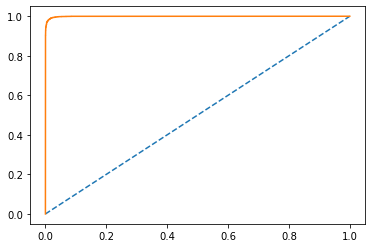

In [261]:
# predict probabilities
probs = Bagging_model_SMOTE.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [262]:
y_test_predict = Bagging_model_SMOTE.predict(x_test)
model_score = Bagging_model_SMOTE.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9487862640615748 

Confusion Matrix 
 [[2722   87]
 [  86  483]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.85      0.85      0.85       569

    accuracy                           0.95      3378
   macro avg       0.91      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



AUC: 0.978


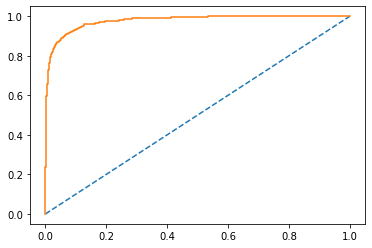

In [263]:
# predict probabilities
probs = Bagging_model_SMOTE.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [266]:
scores = cross_val_score(Bagging_model_SMOTE, x_train_res, y_train_res, cv=10)
scores

array([0.93191057, 0.93597561, 0.94404883, 0.93997965, 0.93591048,
       0.96032553, 0.93591048, 0.95422177, 0.93489318, 0.965412  ])

In [265]:
scores = cross_val_score(Bagging_model_SMOTE, x_test, y_test, cv=10)
scores

array([0.93491124, 0.90236686, 0.89940828, 0.91420118, 0.90828402,
       0.9260355 , 0.9260355 , 0.9260355 , 0.90207715, 0.93175074])

- After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. Hence our model is valid.

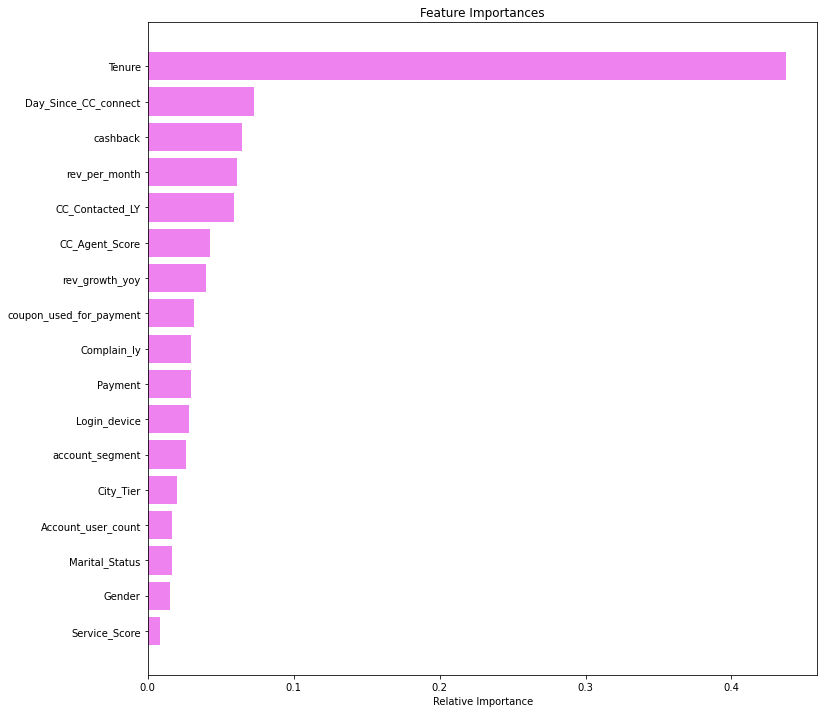

In [295]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in Bagging_model_SMOTE.estimators_
], axis=0)
importances = feature_importances
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Ada Boost (Unscaled Dataset without Outliers - x_train &  x_test)

In [253]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=300,random_state=1)
ADB_model.fit(x_train,y_train)

### Prediction on Train set

In [464]:
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9007866023851814 

Confusion Matrix 
 [[6294  261]
 [ 521  806]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.76      0.61      0.67      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.81      7882
weighted avg       0.90      0.90      0.90      7882



AUC: 0.931


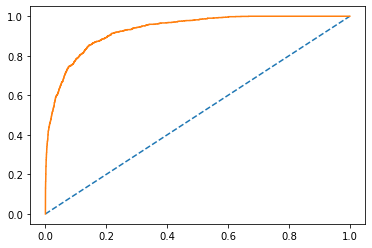

In [465]:
# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [466]:
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9026050917702783 

Confusion Matrix 
 [[2705  104]
 [ 225  344]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.77      0.60      0.68       569

    accuracy                           0.90      3378
   macro avg       0.85      0.78      0.81      3378
weighted avg       0.90      0.90      0.90      3378



AUC: 0.931


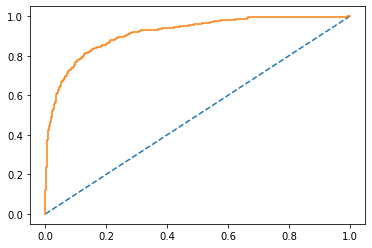

In [467]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## AdaBoost Tuned  (Unscaled Dataset without Outliers - x_train &  x_test)

In [522]:
param_grid = {
    "base_estimator":[DecisionTreeClassifier(max_depth=7),DecisionTreeClassifier(max_depth=8),DecisionTreeClassifier(max_depth=9)],
    "n_estimators": [110,210,310],
    "learning_rate":[0.01,2,0.1]
}

ADB_tuned = AdaBoostClassifier(random_state=1)

grid_search = GridSearchCV(estimator = ADB_tuned, param_grid = param_grid)

In [523]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=7),
                                            DecisionTreeClassifier(max_depth=8),
                                            DecisionTreeClassifier(max_depth=9)],
                         'learning_rate': [0.01, 2, 0.1],
                         'n_estimators': [110, 210, 310]})

In [524]:
grid_search.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=7),
 'learning_rate': 0.1,
 'n_estimators': 310}

In [525]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [526]:
y_train_predict = best_grid.predict(x_train)
model_score = best_grid.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 1.0 

Confusion Matrix 
 [[6555    0]
 [   0 1327]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


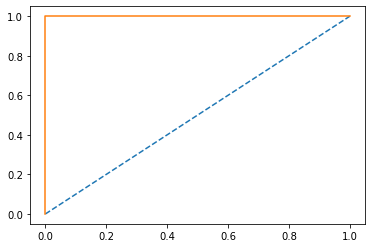

In [527]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [528]:
y_test_predict = best_grid.predict(x_test)
model_score = best_grid.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9760213143872114 

Confusion Matrix 
 [[2800    9]
 [  72  497]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2809
           1       0.98      0.87      0.92       569

    accuracy                           0.98      3378
   macro avg       0.98      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378



AUC: 1.000


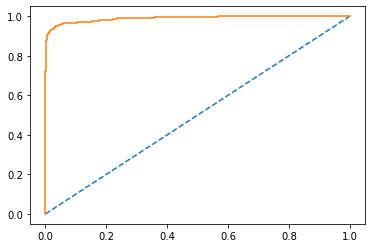

In [529]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

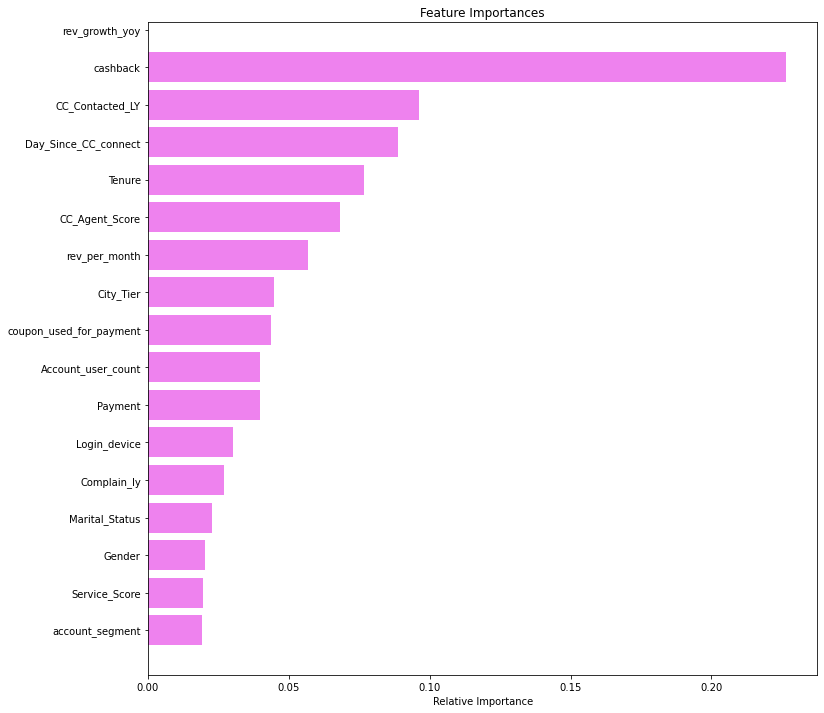

In [530]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Gradient Boosting (unscaled data and without outliers - x_train & x_test)

In [483]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train, y_train)

### Prediction on Train set

In [484]:
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9189292057853337 

Confusion Matrix 
 [[6398  157]
 [ 482  845]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6555
           1       0.84      0.64      0.73      1327

    accuracy                           0.92      7882
   macro avg       0.89      0.81      0.84      7882
weighted avg       0.92      0.92      0.91      7882



AUC: 0.950


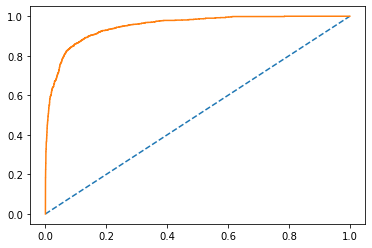

In [485]:
# predict probabilities
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [486]:
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9126702190645353 

Confusion Matrix 
 [[2738   71]
 [ 224  345]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      2809
           1       0.83      0.61      0.70       569

    accuracy                           0.91      3378
   macro avg       0.88      0.79      0.82      3378
weighted avg       0.91      0.91      0.91      3378



AUC: 0.934


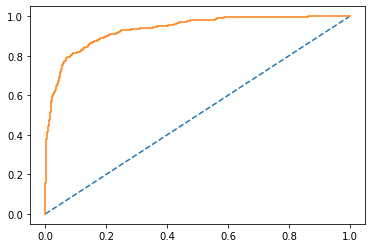

In [487]:
# predict probabilities
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

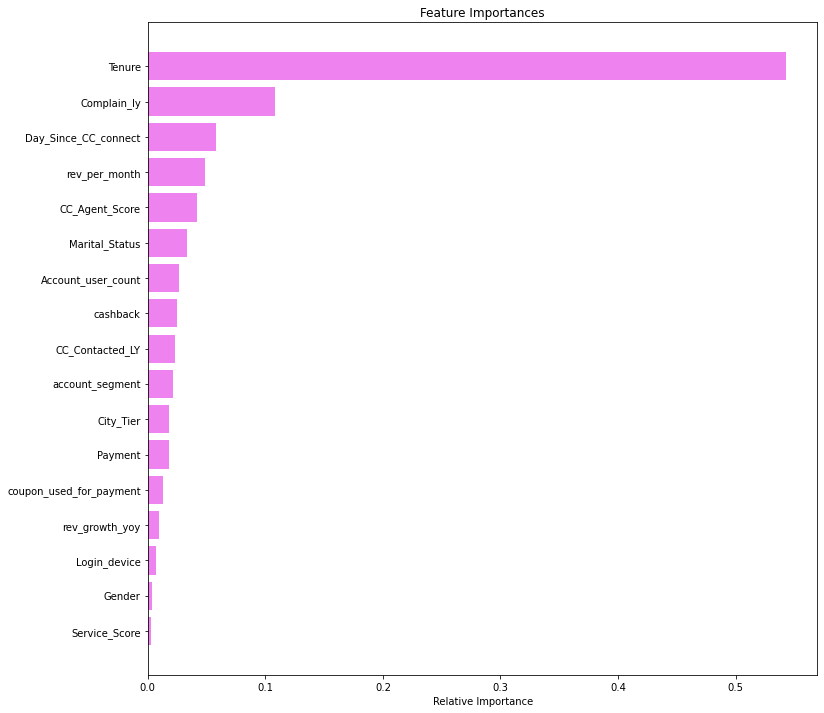

In [488]:
importances = gbcl.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Gradient Boosting Tuned (unscaled data and without outliers - x_train & x_test)

In [542]:
gbcl_tuned = GradientBoostingClassifier(init=RandomForestClassifier(random_state=1),random_state=1)
gbcl_tuned.fit(x_train,y_train)

GradientBoostingClassifier(init=RandomForestClassifier(random_state=1),
                           random_state=1)

In [546]:
param_grid = {
    'max_depth': [30,40,50],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    'n_estimators': [40,45,50]
}
gbcl_tuned = GradientBoostingClassifier(init=RandomForestClassifier(random_state=1),random_state=1)

grid_search = GridSearchCV(estimator = gbcl_tuned, param_grid = param_grid)

In [547]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(init=RandomForestClassifier(random_state=1),
                                                  random_state=1),
             param_grid={'max_depth': [30, 40, 50],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [40, 45, 50],
                         'subsample': [0.8, 0.9, 1]})

In [548]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 0.8, 'n_estimators': 45, 'subsample': 0.9}

In [549]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [550]:
y_train_predict = best_grid.predict(x_train)
model_score = best_grid.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 1.0 

Confusion Matrix 
 [[6555    0]
 [   0 1327]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


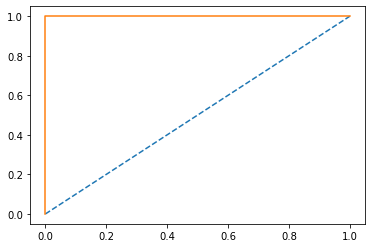

In [551]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [552]:
y_test_predict = best_grid.predict(x_test)
model_score = best_grid.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9754292480757845 

Confusion Matrix 
 [[2802    7]
 [  76  493]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2809
           1       0.99      0.87      0.92       569

    accuracy                           0.98      3378
   macro avg       0.98      0.93      0.95      3378
weighted avg       0.98      0.98      0.97      3378



AUC: 0.994


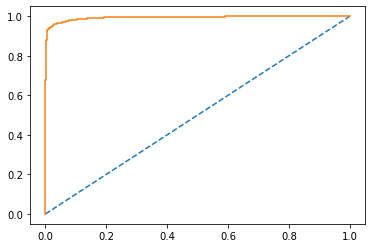

In [553]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

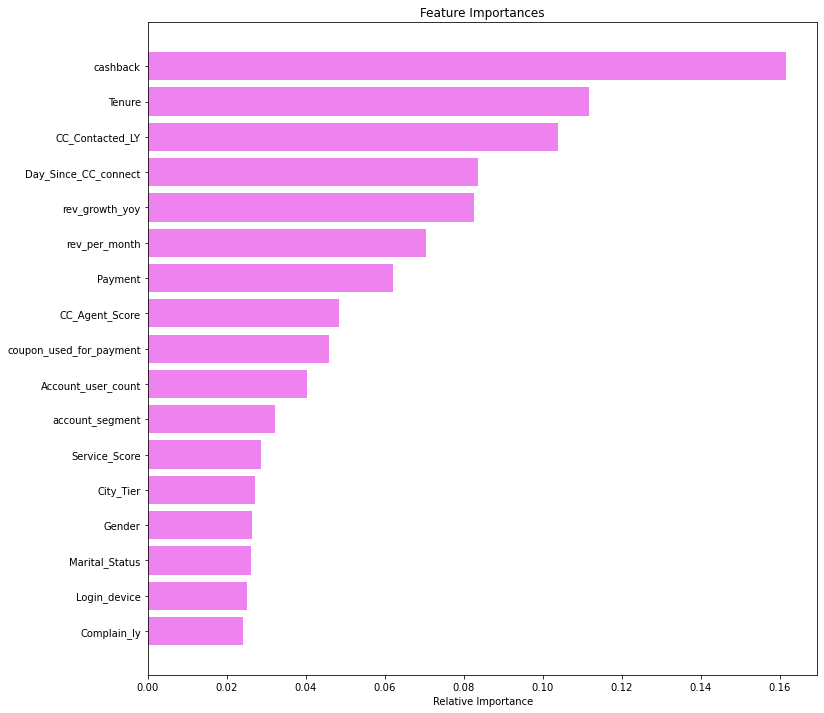

In [554]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBoost (unscaled data and without outliers - x_train & x_test)

In [491]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

### Prediction on Train set

In [492]:
y_train_predict = xgb.predict(x_train)
model_score = xgb.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9997462572951028 

Confusion Matrix 
 [[6555    0]
 [   2 1325]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


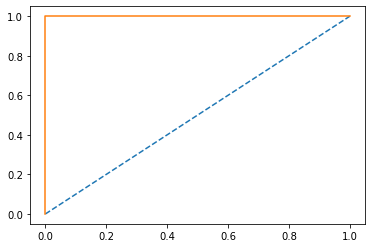

In [493]:
# predict probabilities
probs = xgb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [494]:
y_test_predict = xgb.predict(x_test)
model_score = xgb.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9686204854943754 

Confusion Matrix 
 [[2787   22]
 [  84  485]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.96      0.85      0.90       569

    accuracy                           0.97      3378
   macro avg       0.96      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



AUC: 0.991


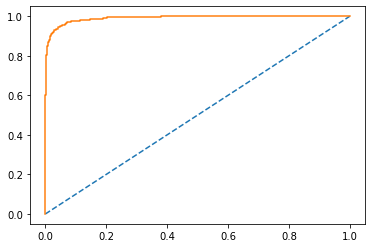

In [495]:
# predict probabilities
probs = xgb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

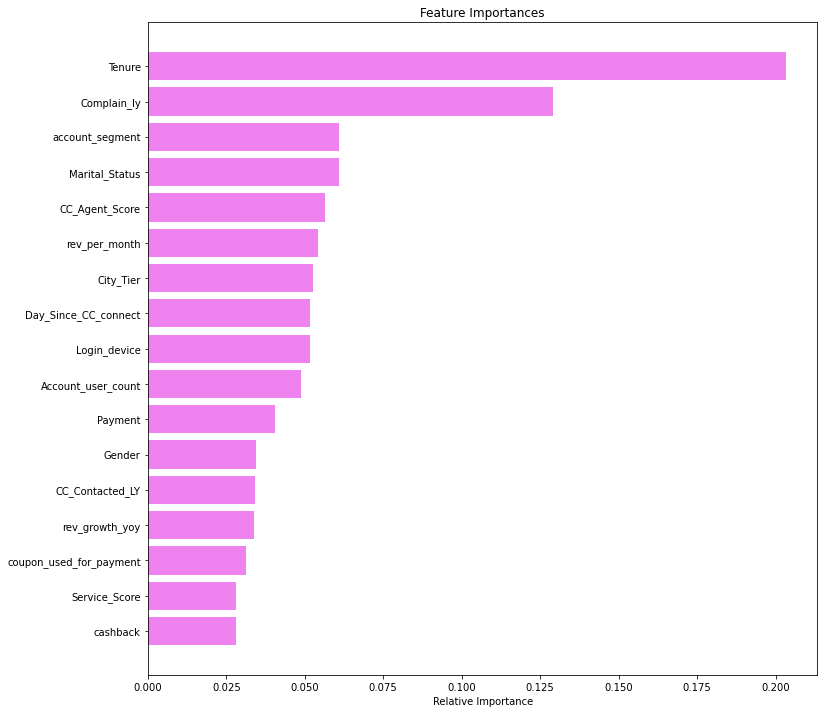

In [496]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBoost Tuned (unscaled data and without outliers - x_train & x_test)

In [592]:
param_grid  = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

xgb_tuned = XGBClassifier(random_state=1)

grid_search = GridSearchCV(estimator = xgb_tuned, param_grid = param_grid)

In [593]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             param_grid={'colsample_bylevel': [0.5, 0.7, 0.9, 1],
                         'colsample_bytree': [0.5, 0.7, 0.9, 1],
                         'gamma': [0, 1, 3],
                         'learning_rate': [0.01, 0.1, 0.2, 0.05],
                         'n_estimators': array([10, 30, 50, 70, 90]),
                         'scale_pos_weight': [0, 1, 2, 5],
                         'subsample': [0.5, 0.7, 0.9, 1]})

In [595]:
grid_search.best_params_

{'colsample_bylevel': 0.9,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.2,
 'n_estimators': 90,
 'scale_pos_weight': 2,
 'subsample': 1}

In [596]:
best_grid = grid_search.best_estimator_

### Prediction on Train set

In [597]:
y_train_predict = best_grid.predict(x_train)
model_score = best_grid.score(x_train, y_train)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_train, y_train_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_train, y_train_predict))

Accuracy Score is 0.9963207307789901 

Confusion Matrix 
 [[6535   20]
 [   9 1318]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       0.99      0.99      0.99      1327

    accuracy                           1.00      7882
   macro avg       0.99      1.00      0.99      7882
weighted avg       1.00      1.00      1.00      7882



AUC: 1.000


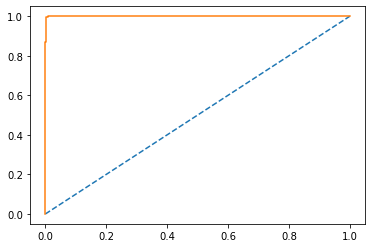

In [598]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Prediction on Test set

In [599]:
y_test_predict = best_grid.predict(x_test)
model_score = best_grid.score(x_test, y_test)
print('Accuracy Score is', model_score,'\n')
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_test_predict),'\n')
print('Classification Report','\n', metrics.classification_report(y_test, y_test_predict))

Accuracy Score is 0.9671403197158082 

Confusion Matrix 
 [[2766   43]
 [  68  501]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2809
           1       0.92      0.88      0.90       569

    accuracy                           0.97      3378
   macro avg       0.95      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378



AUC: 0.989


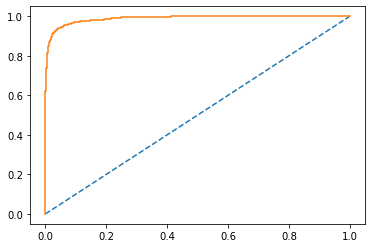

In [600]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

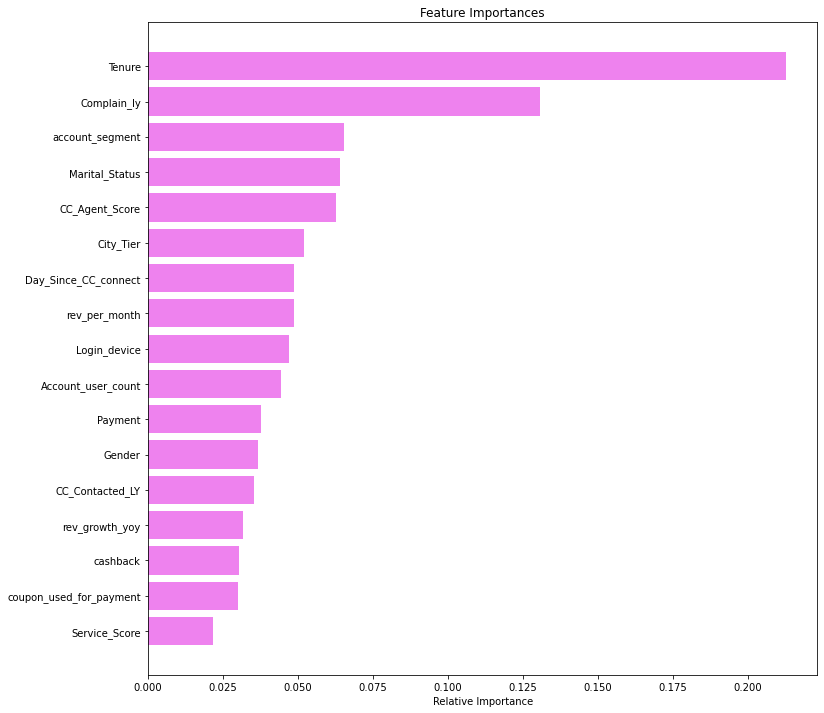

In [601]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [602]:
scores = cross_val_score(best_grid, x_train, y_train, cv=10)
scores

array([0.95690748, 0.96451204, 0.95939086, 0.96573604, 0.95558376,
       0.96573604, 0.94796954, 0.95939086, 0.95177665, 0.96827411])

In [603]:
scores = cross_val_score(best_grid, x_test, y_test, cv=10)
scores

array([0.94674556, 0.91715976, 0.91420118, 0.93195266, 0.91715976,
       0.92899408, 0.93491124, 0.9408284 , 0.91097923, 0.9495549 ])

### K-Means Clustering 

In [361]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [352]:
df = data.drop(['AccountID'], axis = 1)

In [353]:
df_scaled = StandardScaler().fit_transform(df)

In [354]:
df_scaled

array([[ 2.22234528, -0.54761286,  1.48191371, ...,  0.11473932,
        -0.20006117,  0.60512252],
       [ 2.22234528, -0.86116701, -0.70933361, ..., -1.25531872,
        -0.42312786,  0.60512252],
       [ 2.22234528, -0.86116701, -0.70933361, ..., -0.4332839 ,
        -0.16965597,  0.60512252],
       ...,
       [-0.44997508, -0.78277847, -0.70933361, ..., -0.15927229,
        -0.02008756,  0.60512252],
       [-0.44997508,  0.94176936,  1.48191371, ...,  1.21078575,
        -0.08592738, -1.65255791],
       [-0.44997508, -0.23405871, -0.70933361, ..., -0.4332839 ,
        -0.11370356,  0.60512252]])

### Calculating WSS for values of K - Elbow Method

In [355]:
wss =[]

In [356]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [357]:
wss

[202680.0000000002,
 189123.20187858335,
 178921.24167248802,
 171990.45733854486,
 158543.1243746025,
 155349.7426388408,
 151777.27212788898,
 141509.88882323386,
 139380.2544146019,
 132391.98663643817]

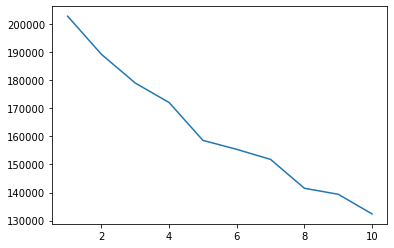

In [358]:
plt.plot(range(1,11), wss)

In [385]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [386]:
silhouette_score(df_scaled,labels)

0.12336437604603798

In [363]:
silhouette_samples(df_scaled,labels).min()

0.0013580240285513245

In [368]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [369]:
silhouette_score(df_scaled,labels)

0.07424420609512918

In [370]:
silhouette_samples(df_scaled,labels).min()

-0.17533947454568208

In [375]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [372]:
silhouette_score(df_scaled,labels)

0.0742940376682887

In [373]:
silhouette_samples(df_scaled,labels).min()

-0.07283738766512156

In [374]:
df["df_kmeans3"] = labels
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,df_kmeans3
0,1,4,3,6,2,0,3,3,3,2,2,9,1,11,1,5,159.93,1,0
1,1,0,1,8,4,1,3,4,2,3,2,7,1,15,0,0,120.90,1,0
2,1,0,1,30,2,1,2,4,2,3,2,6,1,14,0,3,165.25,1,0
3,1,0,3,15,2,1,2,4,3,5,2,8,0,23,0,3,134.07,1,0
4,1,0,1,12,1,1,2,3,2,5,2,3,0,11,1,3,129.60,1,0


In [376]:
df.df_kmeans3.value_counts().sort_index()

0    1841
1    4535
2    4884
Name: df_kmeans3, dtype: int64

In [377]:
clust_profile=df
clust_profile=clust_profile.groupby('df_kmeans3').mean()
clust_profile['df_cust_segment']=df.df_kmeans3.value_counts().sort_index()
np.round(clust_profile,2)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,df_cust_segment
df_kmeans3,,,,,,,,,,,,,,,,,,,
0,1.00,3.11,1.82,19.33,1.78,0.64,2.91,3.92,1.99,3.40,1.38,6.87,0.53,16.13,1.63,3.24,179.92,0.68,1841
1,0.01,14.19,1.64,18.55,1.79,0.58,3.36,4.22,2.11,3.05,1.07,6.78,0.22,16.92,2.72,6.24,220.77,0.73,4535
2,0.00,10.98,1.59,16.64,1.73,0.62,2.48,3.14,2.29,2.95,1.17,5.56,0.23,15.55,0.98,3.55,176.61,0.75,4884


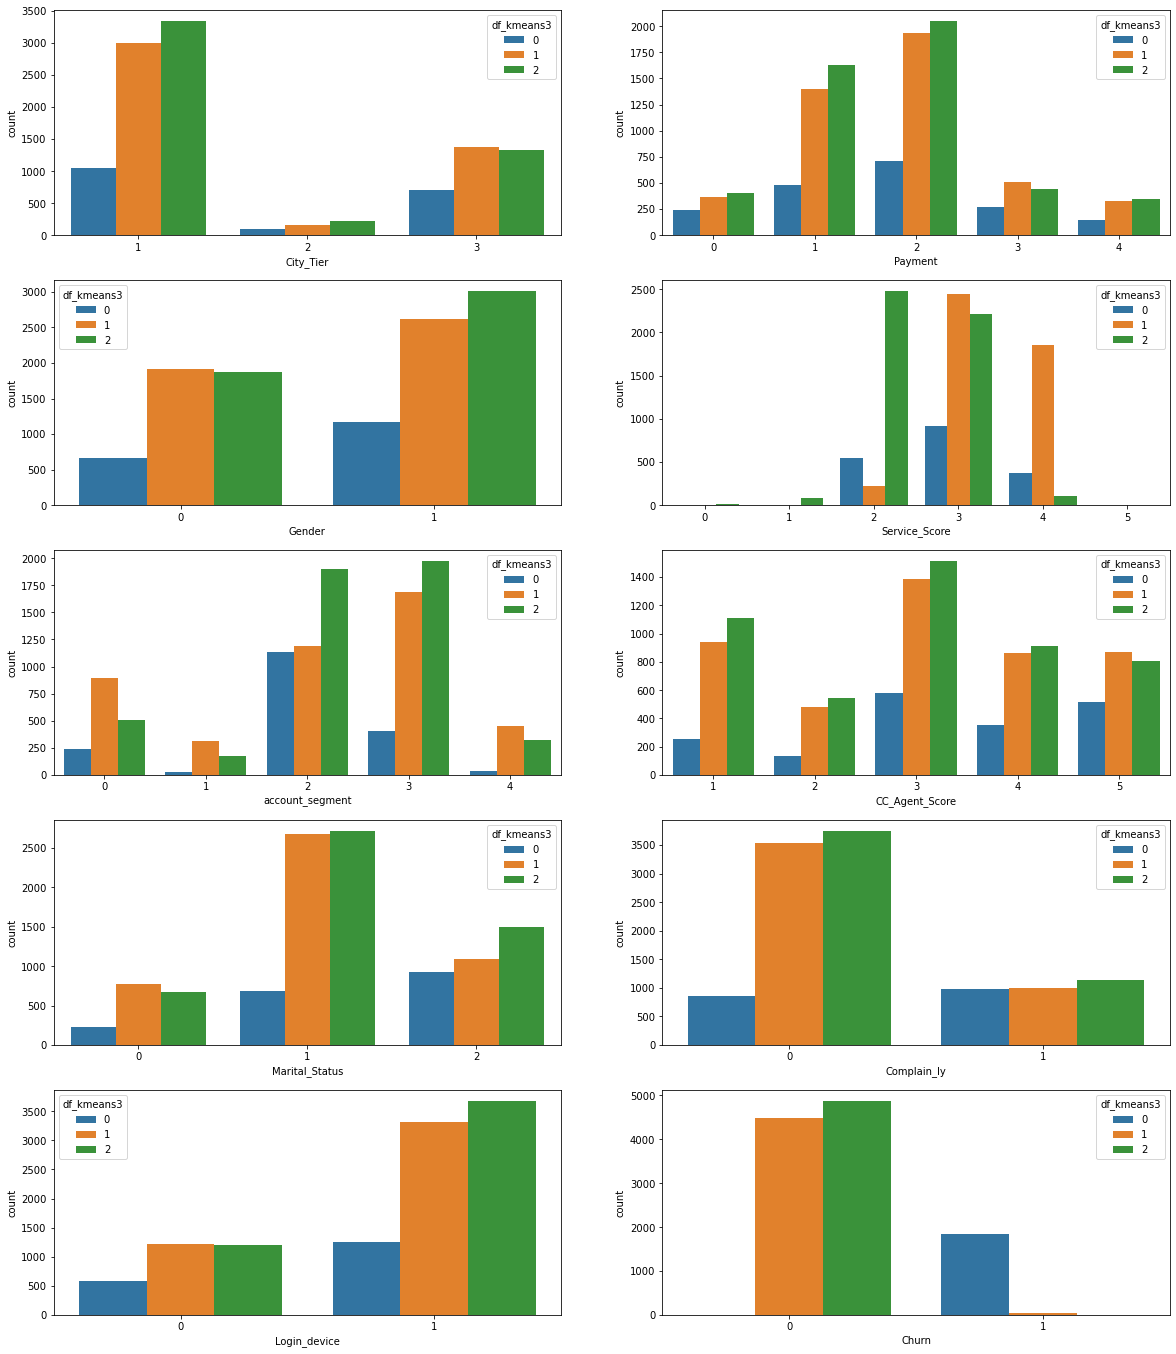

In [384]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,24) 
a = sns.countplot(x='City_Tier', hue='df_kmeans3', data=df, ax = axes[0][0])
a = sns.countplot(x='Payment', hue='df_kmeans3', data=df, ax = axes[0][1])
a = sns.countplot(x='Gender', hue='df_kmeans3', data=df, ax=axes[1][0])
a = sns.countplot(x='Service_Score', hue='df_kmeans3', data=df, ax=axes[1][1])
a = sns.countplot(x='account_segment', hue='df_kmeans3', data=df, ax = axes[2][0])
a = sns.countplot(x='CC_Agent_Score', hue='df_kmeans3', data=df, ax = axes[2][1])
a = sns.countplot(x='Marital_Status', hue='df_kmeans3', data=df, ax = axes[3][0])
a = sns.countplot(x='Complain_ly', hue='df_kmeans3', data=df, ax = axes[3][1])
a = sns.countplot(x='Login_device', hue='df_kmeans3', data=df, ax = axes[4][0])
a = sns.countplot(x='Churn', hue='df_kmeans3', data=df, ax = axes[4][1])

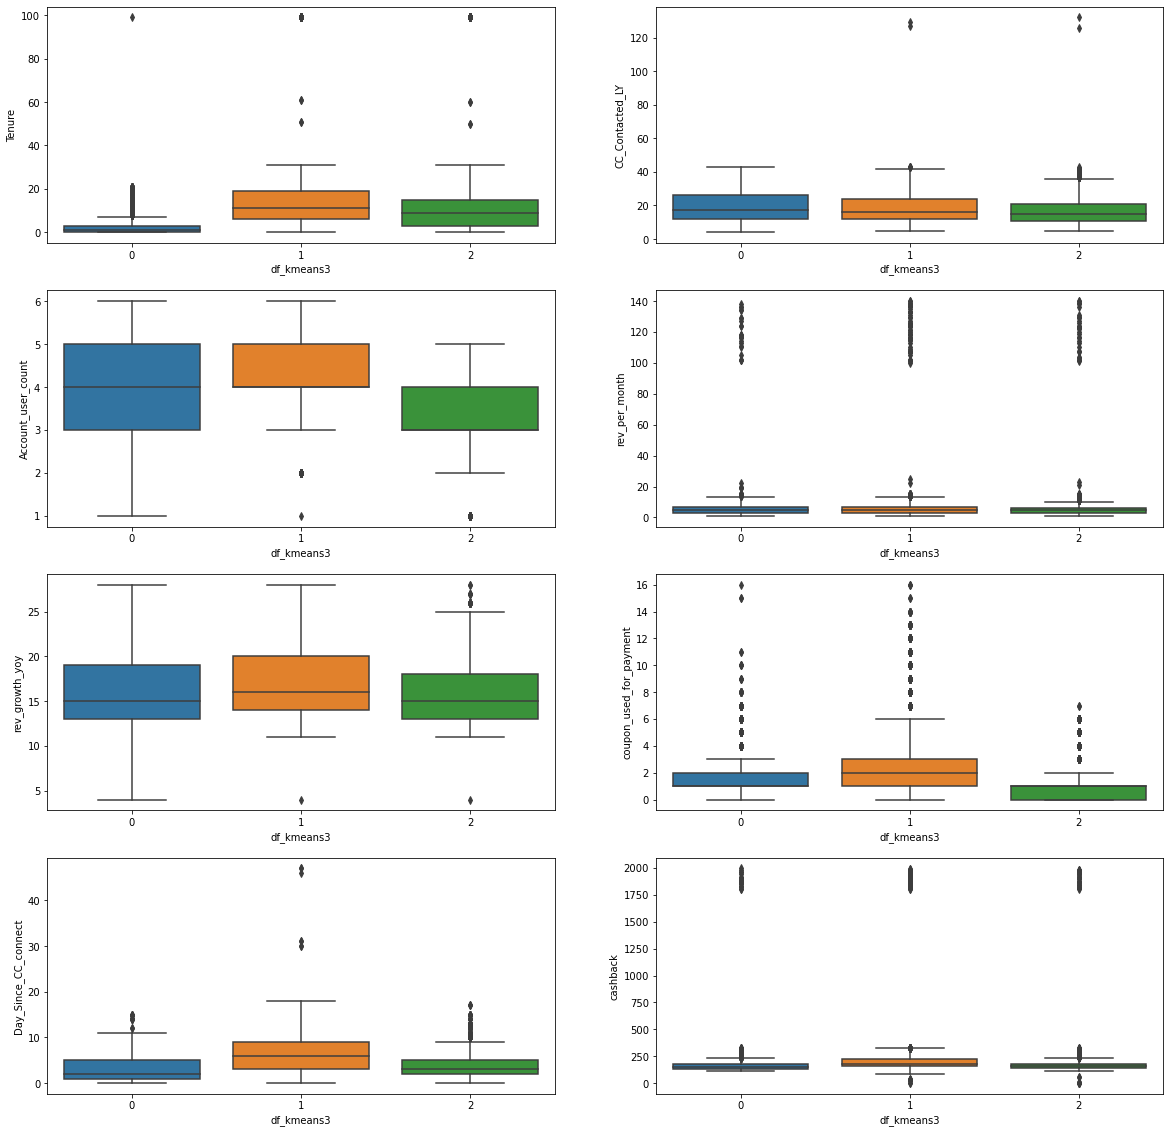

In [389]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20) 
a = sns.boxplot(x='df_kmeans3', y='Tenure', data=df, ax = axes[0][0])
a = sns.boxplot(x='df_kmeans3', y='CC_Contacted_LY', data=df, ax = axes[0][1])
a = sns.boxplot(x='df_kmeans3', y='Account_user_count', data=df, ax=axes[1][0])
a = sns.boxplot(x='df_kmeans3', y='rev_per_month', data=df, ax=axes[1][1])
a = sns.boxplot(x='df_kmeans3', y='rev_growth_yoy', data=df, ax = axes[2][0])
a = sns.boxplot(x='df_kmeans3', y='coupon_used_for_payment', data=df, ax = axes[2][1])
a = sns.boxplot(x='df_kmeans3', y='Day_Since_CC_connect', data=df, ax = axes[3][0])
a = sns.boxplot(x='df_kmeans3', y='cashback', data=df, ax = axes[3][1])

# The End